In [ ]:
import tensorflow as tf

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import random
import cv2
import os
from imutils import paths
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv('dataset_balanced_w_10_dx_3.csv')

In [ ]:
df

id  time  activityrecognition#0  activityrecognition#1  \
0     16170    78                    NaN                    100   
1     15871   145                    NaN                    100   
2     16811   150                    NaN                    100   
3     15831   105                    NaN                     77   
4       876    77                    NaN                    100   
...     ...   ...                    ...                    ...   
5888  14125     4                    NaN                    100   
5889  19582    32                    NaN                     10   
5890  16178    86                    NaN                    100   
5891  10973   199                    NaN                    100   
5892   8278    55                    NaN                    100   

      android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
0                              9.811476                          9.758895   
1                              9.939207                          7.707437   
2                              9.827178                          9.804817   
3                              9.673039                          7.659674   
4                              9.993466                          8.965621   
...                                 ...                               ...   
5888                          10.066610                          4.564648   
5889                           9.964271                          8.768007   
5890                           9.812893                          9.772881   
5891                           9.831144                          9.807347   
5892                          11.051009                          5.203285   

      android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
0                             9.849411                          0.014626   
1                            17.146631                          1.775944   
2                             9.849262                          0.011199   
3                            12.304298                          0.862553   
4                            10.891645                          0.504117   
...                                ...                               ...   
5888                         13.414389                          3.373972   
5889                         11.454213                          0.665529   
5890                          9.862587                          0.017633   
5891                          9.874450                          0.013485   
5892                         19.921068                          4.745098   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#min  ...  sound#mean  sound#min  \
0                                    0.029014  ...         NaN        NaN   
1                                    0.999903  ...   89.200210  89.065143   
2                                    0.665213  ...         NaN        NaN   
3                                    0.993781  ...   87.470377  87.470377   
4                                    0.521799  ...   89.770732  89.770732   
...                                       ...  ...         ...        ...   
5888                                 0.974523  ...         NaN        NaN   
5889                                 0.648343  ...         NaN        NaN   
5890                                 0.024081  ...         NaN        Na

In [ ]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [ ]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/5893
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  5893 out of 5893
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  799 out of 5893
Missing percentage:13.558459188868149%

Feature Name: android.sensor.gam

In [ ]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'speed#std']

In [ ]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
partially_null

['android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.gravity#mean',
 'android.sensor.gravity#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#mean',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field#max',
 'an

In [ ]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  4922 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  4913 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  4914 and Number of missing values:  799

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  4472 and Number of missing values:  800

Partially Null Feature Name: android.sensor.gravity#mean
Number of unique values:  2367 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#min
Number of unique values:  2739 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#max
Number of unique values:  2736 and Number of missing values:  497

Partially Null Feature Name: android.sensor.gravity#std
Number of unique values:  134

In [ ]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [ ]:
newcolumns = list(df.columns)

In [ ]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%


In [ ]:
df

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0       78                    100                           9.811476   
1      145                    100                           9.939207   
2      150                    100                           9.827178   
3      105                     77                           9.673039   
4       77                    100                           9.993466   
...    ...                    ...                                ...   
5888     4                    100                          10.066610   
5889    32                     10                           9.964271   
5890    86                    100                           9.812893   
5891   199                    100                           9.831144   
5892    55                    100                          11.051009   

      android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                             9.758895                          9.849411   
1                             7.707437                         17.146631   
2                             9.804817                          9.849262   
3                             7.659674                         12.304298   
4                             8.965621                         10.891645   
...                                ...                               ...   
5888                          4.564648                         13.414389   
5889                          8.768007                         11.454213   
5890                          9.772881                          9.862587   
5891                          9.807347                          9.874450   
5892                          5.203285                         19.921068   

      android.sensor.accelerometer#std  \
0                             0.014626   
1                             1.775944   
2                             0.011199   
3                             0.862553   
4                             0.504117   
...                                ...   
5888                          3.373972   
5889                          0.665529   
5890                          0.017633   
5891                          0.013485   
5892                          4.745098   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#min  \
0                                    0.029014   
1                                    0.999903   
2                                    0.665213   
3                                    0.993781   
4                                    0.521799   
...                                       ...   
5888                                 0.974523   
5889                                 0.648343   
5890                                 0.024081   
5891                                 0.481209   
5892                                 0.892571   

      android.sensor.game_rotation_vector#max  \
0                                    0.029526   
1                                    0.999946   
2                                    0.665218   
3                                    0.998661   
4                                    0.672664   
...                                       ...   
5888                                 0.992084   
5889                                 0.648974   
5890                                 0.024696   
5891                                 0.4812

In [ ]:
df['target'].unique()

array(['Still', 'Car', 'Train', 'Bus', 'Walking'], dtype=object)

In [ ]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df = df.drop(['user'], axis = 1)

In [ ]:
df

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0       78                    100                           9.811476   
1      145                    100                           9.939207   
2      150                    100                           9.827178   
3      105                     77                           9.673039   
4       77                    100                           9.993466   
...    ...                    ...                                ...   
5888     4                    100                          10.066610   
5889    32                     10                           9.964271   
5890    86                    100                           9.812893   
5891   199                    100                           9.831144   
5892    55                    100                          11.051009   

      android.sensor.accelerometer#min  android.sensor.accelerometer#max  \
0                             9.758895                          9.849411   
1                             7.707437                         17.146631   
2                             9.804817                          9.849262   
3                             7.659674                         12.304298   
4                             8.965621                         10.891645   
...                                ...                               ...   
5888                          4.564648                         13.414389   
5889                          8.768007                         11.454213   
5890                          9.772881                          9.862587   
5891                          9.807347                          9.874450   
5892                          5.203285                         19.921068   

      android.sensor.accelerometer#std  \
0                             0.014626   
1                             1.775944   
2                             0.011199   
3                             0.862553   
4                             0.504117   
...                                ...   
5888                          3.373972   
5889                          0.665529   
5890                          0.017633   
5891                          0.013485   
5892                          4.745098   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#min  \
0                                    0.029014   
1                                    0.999903   
2                                    0.665213   
3                                    0.993781   
4                                    0.521799   
...                                       ...   
5888                                 0.974523   
5889                                 0.648343   
5890                                 0.024081   
5891                                 0.481209   
5892                                 0.892571   

      android.sensor.game_rotation_vector#max  \
0                                    0.029526   
1                                    0.999946   
2                                    0.665218   
3                                    0.998661   
4                                    0.672664   
...                                       ...   
5888                                 0.992084   
5889                                 0.648974   
5890                                 0.024696   
5891                                 0.4812

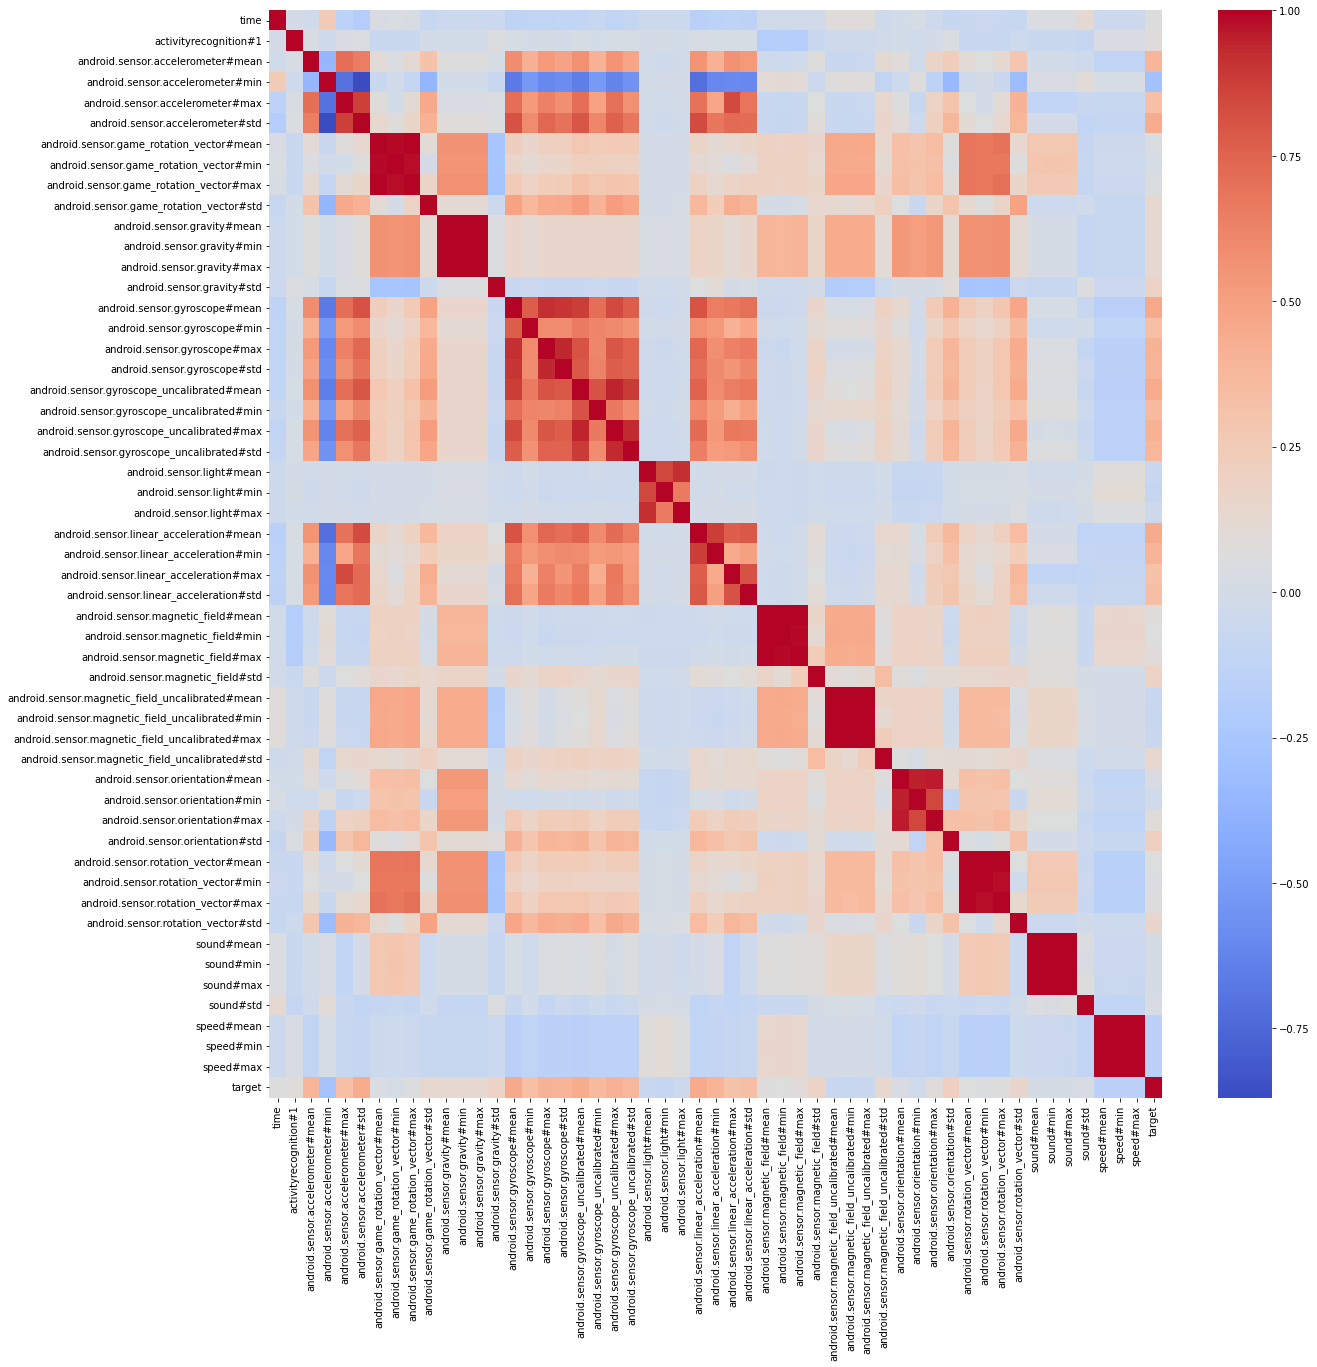

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

32

In [ ]:
corr_features

{'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.orientation#max',
 'android.sens

In [ ]:
df1 = df.drop(corr_features,axis=1)

In [ ]:
df1

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0       78                    100                           9.811476   
1      145                    100                           9.939207   
2      150                    100                           9.827178   
3      105                     77                           9.673039   
4       77                    100                           9.993466   
...    ...                    ...                                ...   
5888     4                    100                          10.066610   
5889    32                     10                           9.964271   
5890    86                    100                           9.812893   
5891   199                    100                           9.831144   
5892    55                    100                          11.051009   

      android.sensor.accelerometer#min  \
0                             9.758895   
1                             7.707437   
2                             9.804817   
3                             7.659674   
4                             8.965621   
...                                ...   
5888                          4.564648   
5889                          8.768007   
5890                          9.772881   
5891                          9.807347   
5892                          5.203285   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                    0.000119                     9.806650   
1                                    0.000030                     9.806624   
2                                    0.000004                     9.806650   
3                                    0.003451                     9.806638   
4                                    0.064792                     9.806650   
...                                       ...                          ...   
5888                                 0.007186                     9.806650   
5889                                 0.000331                     9.806650   
5890                                 0.000211                     9.806650   
5891                                 0.000002                     9.806621   
5892                                 0.019459                     9.806650   

      android.sensor.gravity#std  android.sensor.light#mean  \
0                   4.780000e-07                      0.000   
1                   6.470000e-07                      0.000   
2                   2.820000e-07                      2.000   
3                   2.120000e-06                      0.000   
4                   2.640000e-07                     30.000   
...                          ...                        ...   
5888                2.230000e-07                      4.000   
5889                8.170000e-07                    126.123   
5890                4.290000e-07                      0.000   
5891                2.930000e-05                     16.000   
5892                3.590000e-07                      0.000   

      android.sensor.magnetic_field#mean  ...  \
0                              57.099638  ...   
1                              29.351288  ...   
2                              29.904927  ...   
3                              37.836471  ...   
4                              78.375718  ...   
...                                  ...  ...  

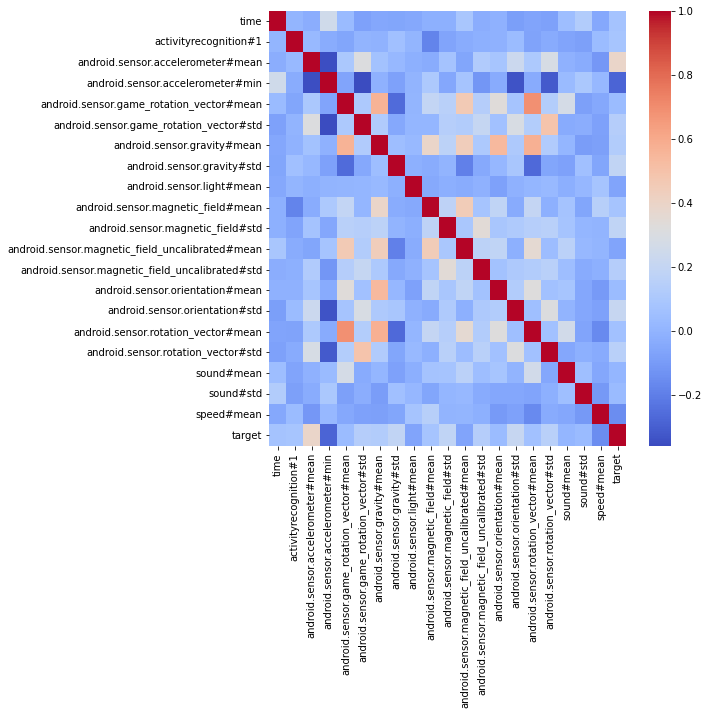

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

#enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

#final_df = df1.join(enc_df)

In [ ]:
final_df = df1

In [ ]:
final_df

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0       78                    100                           9.811476   
1      145                    100                           9.939207   
2      150                    100                           9.827178   
3      105                     77                           9.673039   
4       77                    100                           9.993466   
...    ...                    ...                                ...   
5888     4                    100                          10.066610   
5889    32                     10                           9.964271   
5890    86                    100                           9.812893   
5891   199                    100                           9.831144   
5892    55                    100                          11.051009   

      android.sensor.accelerometer#min  \
0                             9.758895   
1                             7.707437   
2                             9.804817   
3                             7.659674   
4                             8.965621   
...                                ...   
5888                          4.564648   
5889                          8.768007   
5890                          9.772881   
5891                          9.807347   
5892                          5.203285   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                    0.000119                     9.806650   
1                                    0.000030                     9.806624   
2                                    0.000004                     9.806650   
3                                    0.003451                     9.806638   
4                                    0.064792                     9.806650   
...                                       ...                          ...   
5888                                 0.007186                     9.806650   
5889                                 0.000331                     9.806650   
5890                                 0.000211                     9.806650   
5891                                 0.000002                     9.806621   
5892                                 0.019459                     9.806650   

      android.sensor.gravity#std  android.sensor.light#mean  \
0                   4.780000e-07                      0.000   
1                   6.470000e-07                      0.000   
2                   2.820000e-07                      2.000   
3                   2.120000e-06                      0.000   
4                   2.640000e-07                     30.000   
...                          ...                        ...   
5888                2.230000e-07                      4.000   
5889                8.170000e-07                    126.123   
5890                4.290000e-07                      0.000   
5891                2.930000e-05                     16.000   
5892                3.590000e-07                      0.000   

      android.sensor.magnetic_field#mean  ...  \
0                              57.099638  ...   
1                              29.351288  ...   
2                              29.904927  ...   
3                              37.836471  ...   
4                              78.375718  ...   
...                                  ...  ...  

In [ ]:
X = final_df.iloc[:,0:20] 
y = final_df.iloc[:,20]

In [ ]:
X

time  activityrecognition#1  android.sensor.accelerometer#mean  \
0       78                    100                           9.811476   
1      145                    100                           9.939207   
2      150                    100                           9.827178   
3      105                     77                           9.673039   
4       77                    100                           9.993466   
...    ...                    ...                                ...   
5888     4                    100                          10.066610   
5889    32                     10                           9.964271   
5890    86                    100                           9.812893   
5891   199                    100                           9.831144   
5892    55                    100                          11.051009   

      android.sensor.accelerometer#min  \
0                             9.758895   
1                             7.707437   
2                             9.804817   
3                             7.659674   
4                             8.965621   
...                                ...   
5888                          4.564648   
5889                          8.768007   
5890                          9.772881   
5891                          9.807347   
5892                          5.203285   

      android.sensor.game_rotation_vector#mean  \
0                                     0.029340   
1                                     0.999925   
2                                     0.665215   
3                                     0.996221   
4                                     0.563792   
...                                        ...   
5888                                  0.986319   
5889                                  0.648602   
5890                                  0.024392   
5891                                  0.481212   
5892                                  0.919815   

      android.sensor.game_rotation_vector#std  android.sensor.gravity#mean  \
0                                    0.000119                     9.806650   
1                                    0.000030                     9.806624   
2                                    0.000004                     9.806650   
3                                    0.003451                     9.806638   
4                                    0.064792                     9.806650   
...                                       ...                          ...   
5888                                 0.007186                     9.806650   
5889                                 0.000331                     9.806650   
5890                                 0.000211                     9.806650   
5891                                 0.000002                     9.806621   
5892                                 0.019459                     9.806650   

      android.sensor.gravity#std  android.sensor.light#mean  \
0                   4.780000e-07                      0.000   
1                   6.470000e-07                      0.000   
2                   2.820000e-07                      2.000   
3                   2.120000e-06                      0.000   
4                   2.640000e-07                     30.000   
...                          ...                        ...   
5888                2.230000e-07                      4.000   
5889                8.170000e-07                    126.123   
5890                4.290000e-07                      0.000   
5891                2.930000e-05                     16.000   
5892                3.590000e-07                      0.000   

      android.sensor.magnetic_field#mean  android.sensor.magnetic_field#std  \
0                              57.099638                           0.177549   
1                              29.351288                           0.921547   
2                              29.904927                           0.130851   
3                        

In [ ]:
y

0       2
1       1
2       2
3       1
4       1
       ..
5888    4
5889    3
5890    2
5891    2
5892    4
Name: target, Length: 5893, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
y_train.shape

(4714,)

In [ ]:
from re import L

def create_clients(feature_list, label_list, num_clients=5, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of features and label lists.
        args: 
            feature_list: a list of numpy arrays of training features
            label_list:a list of binarized labels for each feature
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    print(len(feature_list))
    print(len(label_list))
    data = list(zip(feature_list, label_list))
    print(len(data))
    random.shuffle(data)
    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [ ]:
X_train.shape

(4714, 20)

In [ ]:

#create clients
clients = create_clients(X_train, y_train, num_clients=5, initial='client')

4714
4714
4714


In [ ]:
len(clients['client_3'])

942

In [ ]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [ ]:

#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(256, input_shape=(20,)))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(5))
        model.add(Activation("softmax"))
        return model

In [ ]:

lr = 0.01 
comms_round = 200
loss='sparse_categorical_crossentropy'
metrics = ['sparse_categorical_accuracy']
optimizer = SGD(learning_rate=lr, 
                decay=lr / comms_round, 
                momentum=0.9)   

In [ ]:
from sklearn.metrics import confusion_matrix
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    y_pred = []
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    c1 = tf.argmax(logits, axis=1).numpy()
    for i in range(len(c1)):
        y_pred.append(c1[i])

    y_pred = np.array(y_pred)

    print("y_pred =", y_pred)
    loss = cce(Y_test, logits)
    print(Y_test)
    acc = accuracy_score(y_pred, Y_test)
    print(y_pred.shape)
    print(Y_test.shape)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    cf=classification_report(Y_test,y_pred)
    print(cf)
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']
    
    cm = confusion_matrix(np.array(Y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

    

    return acc, loss

37/37 [==============================] - 0s 1ms/step
y_pred = [4 3 0 ... 0 0 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 0 | global_acc: 30.365% | global_loss: 1.6000934839248657
              precision    recall  f1-score   support

           0       0.24      0.87      0.38       237
           1       0.30      0.22      0.26       223
           2       0.00      0.00      0.00       247
           3       0.36      0.12      0.18       209
           4       0.80      0.29      0.42       263

    accuracy                           0.30      1179
   macro avg       0.34      0.30      0.25      1179
weighted avg       0.35      0.30      0.25      1179

37/37 [==============================] - 0s 2ms/step
y_pred = [2 1 2 ... 3 1 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 1 | global_acc: 46.819% | global_loss: 1.5910248756408691
              precision    recall  f1-score   support

          

<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 21 | global_acc: 70.483% | global_loss: 1.3172814846038818
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       237
           1       0.68      0.70      0.69       223
           2       0.74      0.83      0.78       247
           3       0.64      0.39      0.49       209
           4       0.87      0.82      0.84       263

    accuracy                           0.70      1179
   macro avg       0.70      0.69      0.69      1179
weighted avg       0.71      0.70      0.70      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 1 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 22 | global_acc: 71.332% | global_loss: 1.3065085411071777
              precision    recall  f1-score   support

           0       0.62      0.74      0.67       237
           1       0.67      0.72      0.69       223
           2       0.75      0.83      0.79       247
           3       0.65      0.33      0.44       209
           4       0.84      0.87      0.86       263

    accuracy                           0.71      1179
   macro avg       0.71      0.70      0.69      1179
weighted avg       0.71      0.71      0.70      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 23 | global_acc: 71.586% | global_loss: 1.3051234483718872
              precision    recall  f1-score   support

           0       0.61      0.73      0.67       237
           1       0.70      0.71      0.71       223
           2       0.74      0.84      0.79       247
           3       0.61      0.44      0.51       209
           4       0.88      0.81      0.85       263

    accuracy                           0.72      1179
   macro avg       0.71      0.71      0.70      1179
weighted avg       0.72      0.72      0.71      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 24 | global_acc: 73.198% | global_loss: 1.2953746318817139
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       237
           1       0.70      0.72      0.71       223
           2       0.78      0.83      0.80       247
           3       0.65      0.46      0.54       209
           4       0.86      0.86      0.86       263

    accuracy                           0.73      1179
   macro avg       0.73      0.72      0.72      1179
weighted avg       0.73      0.73      0.73      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 25 | global_acc: 72.265% | global_loss: 1.290048360824585
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       237
           1       0.72      0.72      0.72       223
           2       0.73      0.85      0.78       247
           3       0.62      0.46      0.53       209
           4       0.88      0.82      0.85       263

    accuracy                           0.72      1179
   macro avg       0.72      0.71      0.71      1179
weighted avg       0.72      0.72      0.72      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 26 | global_acc: 73.791% | global_loss: 1.2892024517059326
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       237
           1       0.74      0.72      0.73       223
           2       0.73      0.89      0.80       247
           3       0.66      0.45      0.54       209
           4       0.89      0.81      0.85       263

    accuracy                           0.74      1179
   macro avg       0.73      0.73      0.72      1179
weighted avg       0.74      0.74      0.73      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 1 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 27 | global_acc: 73.198% | global_loss: 1.2778890132904053
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       237
           1       0.72      0.73      0.73       223
           2       0.69      0.88      0.77       247
           3       0.77      0.37      0.50       209
           4       0.87      0.86      0.86       263

    accuracy                           0.73      1179
   macro avg       0.74      0.72      0.71      1179
weighted avg       0.74      0.73      0.72      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 28 | global_acc: 74.724% | global_loss: 1.2730050086975098
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       237
           1       0.75      0.73      0.74       223
           2       0.77      0.84      0.80       247
           3       0.65      0.55      0.59       209
           4       0.88      0.83      0.86       263

    accuracy                           0.75      1179
   macro avg       0.74      0.74      0.74      1179
weighted avg       0.75      0.75      0.75      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 1]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 29 | global_acc: 74.979% | global_loss: 1.2655255794525146
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       237
           1       0.73      0.75      0.74       223
           2       0.79      0.82      0.80       247
           3       0.66      0.52      0.58       209
           4       0.88      0.84      0.86       263

    accuracy                           0.75      1179
   macro avg       0.74      0.74      0.74      1179
weighted avg       0.75      0.75      0.75      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 30 | global_acc: 75.997% | global_loss: 1.2615500688552856
              precision    recall  f1-score   support

           0       0.70      0.76      0.72       237
           1       0.79      0.70      0.75       223
           2       0.77      0.84      0.81       247
           3       0.67      0.58      0.62       209
           4       0.84      0.88      0.86       263

    accuracy                           0.76      1179
   macro avg       0.75      0.75      0.75      1179
weighted avg       0.76      0.76      0.76      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 31 | global_acc: 75.997% | global_loss: 1.2572709321975708
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       237
           1       0.81      0.69      0.74       223
           2       0.80      0.82      0.81       247
           3       0.66      0.61      0.64       209
           4       0.88      0.83      0.85       263

    accuracy                           0.76      1179
   macro avg       0.76      0.75      0.75      1179
weighted avg       0.77      0.76      0.76      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 32 | global_acc: 77.439% | global_loss: 1.2512162923812866
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       237
           1       0.82      0.72      0.77       223
           2       0.79      0.83      0.81       247
           3       0.68      0.66      0.67       209
           4       0.89      0.86      0.87       263

    accuracy                           0.77      1179
   macro avg       0.77      0.77      0.77      1179
weighted avg       0.78      0.77      0.77      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 33 | global_acc: 77.014% | global_loss: 1.2533243894577026
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       237
           1       0.86      0.69      0.77       223
           2       0.78      0.84      0.81       247
           3       0.66      0.69      0.68       209
           4       0.90      0.81      0.85       263

    accuracy                           0.77      1179
   macro avg       0.78      0.77      0.77      1179
weighted avg       0.78      0.77      0.77      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 34 | global_acc: 77.354% | global_loss: 1.2427903413772583
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       237
           1       0.80      0.73      0.77       223
           2       0.81      0.81      0.81       247
           3       0.69      0.62      0.65       209
           4       0.85      0.89      0.87       263

    accuracy                           0.77      1179
   macro avg       0.77      0.77      0.77      1179
weighted avg       0.77      0.77      0.77      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 35 | global_acc: 77.778% | global_loss: 1.2375609874725342
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       237
           1       0.79      0.77      0.78       223
           2       0.79      0.85      0.82       247
           3       0.72      0.58      0.64       209
           4       0.86      0.87      0.87       263

    accuracy                           0.78      1179
   macro avg       0.77      0.77      0.77      1179
weighted avg       0.78      0.78      0.78      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 36 | global_acc: 77.439% | global_loss: 1.2307686805725098
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       237
           1       0.81      0.72      0.76       223
           2       0.78      0.85      0.81       247
           3       0.71      0.58      0.64       209
           4       0.88      0.86      0.87       263

    accuracy                           0.77      1179
   macro avg       0.77      0.77      0.77      1179
weighted avg       0.78      0.77      0.77      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 37 | global_acc: 77.863% | global_loss: 1.225176453590393
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       237
           1       0.83      0.72      0.77       223
           2       0.75      0.87      0.81       247
           3       0.78      0.58      0.67       209
           4       0.86      0.88      0.87       263

    accuracy                           0.78      1179
   macro avg       0.78      0.77      0.77      1179
weighted avg       0.78      0.78      0.78      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 38 | global_acc: 78.456% | global_loss: 1.2283183336257935
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       237
           1       0.83      0.75      0.79       223
           2       0.81      0.82      0.81       247
           3       0.68      0.72      0.70       209
           4       0.89      0.84      0.86       263

    accuracy                           0.78      1179
   macro avg       0.78      0.78      0.78      1179
weighted avg       0.79      0.78      0.79      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 39 | global_acc: 78.032% | global_loss: 1.22041916847229
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       237
           1       0.85      0.71      0.77       223
           2       0.83      0.81      0.82       247
           3       0.71      0.65      0.68       209
           4       0.88      0.85      0.87       263

    accuracy                           0.78      1179
   macro avg       0.79      0.77      0.78      1179
weighted avg       0.79      0.78      0.78      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 40 | global_acc: 79.813% | global_loss: 1.217069149017334
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       237
           1       0.84      0.74      0.79       223
           2       0.82      0.83      0.83       247
           3       0.79      0.65      0.71       209
           4       0.86      0.90      0.88       263

    accuracy                           0.80      1179
   macro avg       0.80      0.79      0.79      1179
weighted avg       0.80      0.80      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 41 | global_acc: 79.474% | global_loss: 1.218538522720337
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       237
           1       0.87      0.74      0.80       223
           2       0.82      0.85      0.83       247
           3       0.77      0.66      0.71       209
           4       0.90      0.84      0.87       263

    accuracy                           0.79      1179
   macro avg       0.80      0.79      0.79      1179
weighted avg       0.81      0.79      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 42 | global_acc: 79.389% | global_loss: 1.2095690965652466
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       237
           1       0.89      0.69      0.78       223
           2       0.80      0.86      0.83       247
           3       0.75      0.69      0.72       209
           4       0.89      0.85      0.87       263

    accuracy                           0.79      1179
   macro avg       0.80      0.79      0.79      1179
weighted avg       0.80      0.79      0.79      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 43 | global_acc: 79.729% | global_loss: 1.205868124961853
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       237
           1       0.87      0.72      0.79       223
           2       0.84      0.81      0.83       247
           3       0.71      0.72      0.72       209
           4       0.89      0.86      0.87       263

    accuracy                           0.80      1179
   macro avg       0.80      0.79      0.79      1179
weighted avg       0.81      0.80      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 44 | global_acc: 80.322% | global_loss: 1.2018197774887085
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       237
           1       0.88      0.72      0.80       223
           2       0.84      0.82      0.83       247
           3       0.75      0.73      0.74       209
           4       0.88      0.87      0.88       263

    accuracy                           0.80      1179
   macro avg       0.81      0.80      0.80      1179
weighted avg       0.81      0.80      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 45 | global_acc: 80.916% | global_loss: 1.2027908563613892
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       237
           1       0.84      0.75      0.79       223
           2       0.87      0.79      0.83       247
           3       0.76      0.74      0.75       209
           4       0.88      0.90      0.89       263

    accuracy                           0.81      1179
   macro avg       0.81      0.80      0.81      1179
weighted avg       0.81      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 46 | global_acc: 79.983% | global_loss: 1.1968259811401367
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       237
           1       0.89      0.72      0.80       223
           2       0.84      0.81      0.82       247
           3       0.75      0.70      0.73       209
           4       0.88      0.87      0.88       263

    accuracy                           0.80      1179
   macro avg       0.81      0.79      0.80      1179
weighted avg       0.81      0.80      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 47 | global_acc: 80.916% | global_loss: 1.193745732307434
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       237
           1       0.85      0.75      0.80       223
           2       0.81      0.85      0.83       247
           3       0.78      0.72      0.75       209
           4       0.89      0.86      0.88       263

    accuracy                           0.81      1179
   macro avg       0.81      0.80      0.81      1179
weighted avg       0.81      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 48 | global_acc: 81.086% | global_loss: 1.1921981573104858
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       237
           1       0.86      0.74      0.80       223
           2       0.86      0.80      0.83       247
           3       0.76      0.74      0.75       209
           4       0.89      0.89      0.89       263

    accuracy                           0.81      1179
   macro avg       0.81      0.81      0.81      1179
weighted avg       0.82      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 49 | global_acc: 79.644% | global_loss: 1.1956322193145752
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       237
           1       0.86      0.74      0.80       223
           2       0.76      0.88      0.81       247
           3       0.93      0.58      0.71       209
           4       0.90      0.87      0.88       263

    accuracy                           0.80      1179
   macro avg       0.82      0.79      0.79      1179
weighted avg       0.82      0.80      0.80      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 50 | global_acc: 81.510% | global_loss: 1.1895606517791748
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       237
           1       0.87      0.76      0.81       223
           2       0.83      0.84      0.84       247
           3       0.80      0.74      0.77       209
           4       0.90      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 51 | global_acc: 80.746% | global_loss: 1.1882176399230957
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       237
           1       0.88      0.72      0.80       223
           2       0.76      0.89      0.82       247
           3       0.89      0.65      0.75       209
           4       0.89      0.87      0.88       263

    accuracy                           0.81      1179
   macro avg       0.82      0.80      0.80      1179
weighted avg       0.82      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 52 | global_acc: 81.340% | global_loss: 1.1830577850341797
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       237
           1       0.87      0.74      0.80       223
           2       0.85      0.81      0.83       247
           3       0.75      0.78      0.76       209
           4       0.89      0.88      0.88       263

    accuracy                           0.81      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 53 | global_acc: 81.595% | global_loss: 1.1827571392059326
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       237
           1       0.87      0.75      0.81       223
           2       0.81      0.87      0.84       247
           3       0.82      0.74      0.78       209
           4       0.91      0.85      0.88       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 54 | global_acc: 80.916% | global_loss: 1.177146077156067
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       237
           1       0.89      0.73      0.80       223
           2       0.81      0.86      0.83       247
           3       0.79      0.74      0.76       209
           4       0.91      0.84      0.87       263

    accuracy                           0.81      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 55 | global_acc: 82.273% | global_loss: 1.1738548278808594
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       237
           1       0.87      0.76      0.81       223
           2       0.80      0.87      0.83       247
           3       0.86      0.73      0.79       209
           4       0.87      0.90      0.89       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 56 | global_acc: 81.425% | global_loss: 1.1746423244476318
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       237
           1       0.88      0.74      0.80       223
           2       0.83      0.82      0.82       247
           3       0.78      0.76      0.77       209
           4       0.90      0.87      0.89       263

    accuracy                           0.81      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.81      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 57 | global_acc: 81.849% | global_loss: 1.1697890758514404
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       237
           1       0.89      0.72      0.80       223
           2       0.82      0.86      0.84       247
           3       0.80      0.76      0.78       209
           4       0.86      0.90      0.88       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.82      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 58 | global_acc: 80.577% | global_loss: 1.172776222229004
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       237
           1       0.89      0.72      0.80       223
           2       0.84      0.81      0.82       247
           3       0.74      0.80      0.77       209
           4       0.91      0.83      0.87       263

    accuracy                           0.81      1179
   macro avg       0.81      0.80      0.80      1179
weighted avg       0.82      0.81      0.81      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 59 | global_acc: 81.595% | global_loss: 1.1666182279586792
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       237
           1       0.87      0.74      0.80       223
           2       0.84      0.81      0.83       247
           3       0.72      0.82      0.77       209
           4       0.86      0.89      0.88       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 60 | global_acc: 81.510% | global_loss: 1.166868805885315
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       237
           1       0.89      0.71      0.79       223
           2       0.79      0.88      0.83       247
           3       0.82      0.73      0.77       209
           4       0.90      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 61 | global_acc: 82.188% | global_loss: 1.1644227504730225
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       237
           1       0.88      0.75      0.81       223
           2       0.81      0.85      0.83       247
           3       0.83      0.76      0.79       209
           4       0.87      0.90      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 62 | global_acc: 81.679% | global_loss: 1.1685768365859985
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       237
           1       0.88      0.74      0.81       223
           2       0.81      0.85      0.83       247
           3       0.87      0.73      0.80       209
           4       0.90      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.81      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 63 | global_acc: 82.612% | global_loss: 1.161803126335144
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       237
           1       0.90      0.72      0.80       223
           2       0.81      0.87      0.84       247
           3       0.84      0.76      0.80       209
           4       0.88      0.90      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 64 | global_acc: 82.103% | global_loss: 1.1611922979354858
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       237
           1       0.90      0.74      0.81       223
           2       0.83      0.84      0.83       247
           3       0.81      0.78      0.80       209
           4       0.90      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 65 | global_acc: 82.782% | global_loss: 1.1595596075057983
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       237
           1       0.86      0.80      0.83       223
           2       0.85      0.83      0.84       247
           3       0.79      0.78      0.78       209
           4       0.90      0.88      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 66 | global_acc: 82.782% | global_loss: 1.1594619750976562
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       237
           1       0.87      0.74      0.80       223
           2       0.82      0.86      0.84       247
           3       0.86      0.77      0.81       209
           4       0.88      0.91      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.82      0.83      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 67 | global_acc: 81.679% | global_loss: 1.155953288078308
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       237
           1       0.87      0.76      0.81       223
           2       0.86      0.81      0.83       247
           3       0.72      0.85      0.78       209
           4       0.91      0.84      0.87       263

    accuracy                           0.82      1179
   macro avg       0.82      0.82      0.82      1179
weighted avg       0.82      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 68 | global_acc: 82.443% | global_loss: 1.1543248891830444
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       237
           1       0.88      0.73      0.80       223
           2       0.80      0.88      0.84       247
           3       0.89      0.75      0.81       209
           4       0.86      0.90      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 69 | global_acc: 81.510% | global_loss: 1.1583466529846191
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       237
           1       0.89      0.74      0.81       223
           2       0.84      0.84      0.84       247
           3       0.76      0.78      0.77       209
           4       0.92      0.83      0.87       263

    accuracy                           0.82      1179
   macro avg       0.82      0.81      0.81      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 70 | global_acc: 81.934% | global_loss: 1.1545063257217407
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       237
           1       0.89      0.73      0.80       223
           2       0.80      0.86      0.83       247
           3       0.81      0.76      0.79       209
           4       0.91      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 71 | global_acc: 82.273% | global_loss: 1.1532042026519775
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       237
           1       0.88      0.75      0.81       223
           2       0.84      0.83      0.84       247
           3       0.75      0.81      0.78       209
           4       0.89      0.88      0.89       263

    accuracy                           0.82      1179
   macro avg       0.82      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 72 | global_acc: 83.206% | global_loss: 1.1523905992507935
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       237
           1       0.86      0.78      0.82       223
           2       0.89      0.80      0.84       247
           3       0.81      0.81      0.81       209
           4       0.89      0.90      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 73 | global_acc: 82.443% | global_loss: 1.1499781608581543
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       237
           1       0.89      0.76      0.82       223
           2       0.84      0.81      0.83       247
           3       0.75      0.83      0.79       209
           4       0.90      0.87      0.89       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 74 | global_acc: 82.867% | global_loss: 1.1482442617416382
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       237
           1       0.88      0.74      0.80       223
           2       0.89      0.81      0.85       247
           3       0.77      0.84      0.80       209
           4       0.89      0.89      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 75 | global_acc: 82.443% | global_loss: 1.150657296180725
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       237
           1       0.88      0.75      0.81       223
           2       0.82      0.87      0.84       247
           3       0.85      0.77      0.81       209
           4       0.92      0.85      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 76 | global_acc: 81.849% | global_loss: 1.1473643779754639
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       237
           1       0.90      0.74      0.81       223
           2       0.82      0.85      0.83       247
           3       0.80      0.79      0.80       209
           4       0.92      0.84      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 77 | global_acc: 82.697% | global_loss: 1.1450153589248657
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       237
           1       0.90      0.73      0.80       223
           2       0.84      0.83      0.84       247
           3       0.77      0.81      0.79       209
           4       0.90      0.89      0.90       263

    accuracy                           0.83      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 78 | global_acc: 83.121% | global_loss: 1.1436636447906494
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       237
           1       0.88      0.77      0.82       223
           2       0.86      0.82      0.84       247
           3       0.79      0.82      0.80       209
           4       0.88      0.90      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 79 | global_acc: 82.697% | global_loss: 1.1515594720840454
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       237
           1       0.89      0.77      0.82       223
           2       0.78      0.89      0.83       247
           3       0.94      0.71      0.81       209
           4       0.92      0.86      0.89       263

    accuracy                           0.83      1179
   macro avg       0.84      0.82      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 80 | global_acc: 83.121% | global_loss: 1.139479637145996
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       237
           1       0.90      0.75      0.82       223
           2       0.88      0.82      0.85       247
           3       0.79      0.82      0.80       209
           4       0.88      0.90      0.89       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 81 | global_acc: 83.121% | global_loss: 1.1429098844528198
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       237
           1       0.91      0.74      0.81       223
           2       0.81      0.87      0.84       247
           3       0.87      0.78      0.82       209
           4       0.89      0.90      0.89       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 82 | global_acc: 83.036% | global_loss: 1.1359859704971313
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       237
           1       0.89      0.77      0.83       223
           2       0.85      0.82      0.83       247
           3       0.77      0.83      0.80       209
           4       0.89      0.89      0.89       263

    accuracy                           0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.83      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 83 | global_acc: 82.443% | global_loss: 1.1409101486206055
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       237
           1       0.90      0.75      0.82       223
           2       0.83      0.84      0.84       247
           3       0.80      0.80      0.80       209
           4       0.90      0.86      0.88       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 84 | global_acc: 83.715% | global_loss: 1.1413507461547852
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       237
           1       0.92      0.73      0.81       223
           2       0.80      0.89      0.84       247
           3       0.91      0.77      0.83       209
           4       0.90      0.91      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.83      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 85 | global_acc: 83.461% | global_loss: 1.1403005123138428
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       237
           1       0.88      0.82      0.84       223
           2       0.89      0.80      0.84       247
           3       0.77      0.85      0.81       209
           4       0.93      0.86      0.89       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 86 | global_acc: 84.139% | global_loss: 1.141219973564148
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       237
           1       0.91      0.75      0.82       223
           2       0.82      0.88      0.85       247
           3       0.96      0.74      0.84       209
           4       0.90      0.90      0.90       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 87 | global_acc: 82.273% | global_loss: 1.1372387409210205
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       237
           1       0.91      0.72      0.80       223
           2       0.83      0.84      0.83       247
           3       0.80      0.80      0.80       209
           4       0.92      0.86      0.89       263

    accuracy                           0.82      1179
   macro avg       0.83      0.82      0.82      1179
weighted avg       0.83      0.82      0.82      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 88 | global_acc: 84.054% | global_loss: 1.1365796327590942
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       237
           1       0.89      0.81      0.85       223
           2       0.80      0.89      0.84       247
           3       0.92      0.75      0.83       209
           4       0.91      0.87      0.89       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 89 | global_acc: 83.376% | global_loss: 1.1324645280838013
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       237
           1       0.91      0.74      0.82       223
           2       0.81      0.87      0.84       247
           3       0.86      0.78      0.82       209
           4       0.89      0.90      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 90 | global_acc: 83.376% | global_loss: 1.1332920789718628
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       237
           1       0.90      0.77      0.83       223
           2       0.84      0.83      0.83       247
           3       0.86      0.78      0.81       209
           4       0.90      0.89      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 91 | global_acc: 83.800% | global_loss: 1.1334412097930908
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       237
           1       0.90      0.79      0.84       223
           2       0.84      0.85      0.84       247
           3       0.83      0.79      0.81       209
           4       0.93      0.87      0.90       263

    accuracy                           0.84      1179
   macro avg       0.84      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 92 | global_acc: 83.630% | global_loss: 1.132975459098816
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       237
           1       0.91      0.78      0.84       223
           2       0.85      0.82      0.83       247
           3       0.83      0.81      0.82       209
           4       0.90      0.89      0.90       263

    accuracy                           0.84      1179
   macro avg       0.84      0.83      0.84      1179
weighted avg       0.84      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 93 | global_acc: 84.563% | global_loss: 1.1309956312179565
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       237
           1       0.89      0.79      0.84       223
           2       0.90      0.82      0.86       247
           3       0.80      0.87      0.83       209
           4       0.90      0.90      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 94 | global_acc: 83.121% | global_loss: 1.1297366619110107
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       237
           1       0.91      0.75      0.82       223
           2       0.86      0.83      0.84       247
           3       0.79      0.81      0.80       209
           4       0.89      0.89      0.89       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 95 | global_acc: 84.139% | global_loss: 1.1311813592910767
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       237
           1       0.89      0.82      0.85       223
           2       0.80      0.89      0.84       247
           3       0.92      0.75      0.83       209
           4       0.93      0.86      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 96 | global_acc: 84.054% | global_loss: 1.1318039894104004
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.91      0.78      0.84       223
           2       0.83      0.83      0.83       247
           3       0.88      0.78      0.83       209
           4       0.90      0.90      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 97 | global_acc: 83.121% | global_loss: 1.1273982524871826
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       237
           1       0.90      0.77      0.83       223
           2       0.84      0.82      0.83       247
           3       0.82      0.79      0.81       209
           4       0.89      0.90      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 98 | global_acc: 84.648% | global_loss: 1.1284844875335693
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       237
           1       0.90      0.80      0.85       223
           2       0.82      0.88      0.85       247
           3       0.91      0.77      0.84       209
           4       0.90      0.90      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 99 | global_acc: 84.648% | global_loss: 1.1286166906356812
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       237
           1       0.90      0.80      0.85       223
           2       0.86      0.83      0.84       247
           3       0.86      0.78      0.82       209
           4       0.91      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 100 | global_acc: 83.206% | global_loss: 1.127815842628479
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       237
           1       0.93      0.72      0.81       223
           2       0.82      0.85      0.83       247
           3       0.86      0.78      0.82       209
           4       0.90      0.90      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 101 | global_acc: 83.885% | global_loss: 1.1233751773834229
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       237
           1       0.92      0.75      0.82       223
           2       0.87      0.82      0.84       247
           3       0.78      0.85      0.82       209
           4       0.90      0.90      0.90       263

    accuracy                           0.84      1179
   macro avg       0.84      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 102 | global_acc: 84.054% | global_loss: 1.1311107873916626
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       237
           1       0.92      0.78      0.84       223
           2       0.82      0.89      0.85       247
           3       0.94      0.77      0.84       209
           4       0.94      0.85      0.89       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 103 | global_acc: 83.885% | global_loss: 1.1236848831176758
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       237
           1       0.91      0.76      0.83       223
           2       0.83      0.86      0.85       247
           3       0.86      0.79      0.83       209
           4       0.91      0.89      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 104 | global_acc: 83.800% | global_loss: 1.1231032609939575
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       237
           1       0.92      0.76      0.83       223
           2       0.81      0.88      0.84       247
           3       0.90      0.78      0.83       209
           4       0.88      0.91      0.89       263

    accuracy                           0.84      1179
   macro avg       0.85      0.83      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 105 | global_acc: 84.478% | global_loss: 1.1280189752578735
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       237
           1       0.91      0.78      0.84       223
           2       0.82      0.87      0.85       247
           3       0.94      0.77      0.84       209
           4       0.93      0.87      0.90       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.85      1179
weighted avg       0.86      0.84      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 106 | global_acc: 83.800% | global_loss: 1.1219512224197388
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       237
           1       0.94      0.73      0.82       223
           2       0.86      0.83      0.85       247
           3       0.80      0.85      0.82       209
           4       0.89      0.90      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 107 | global_acc: 84.054% | global_loss: 1.122310996055603
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       237
           1       0.91      0.77      0.84       223
           2       0.82      0.86      0.84       247
           3       0.86      0.79      0.82       209
           4       0.94      0.88      0.91       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 108 | global_acc: 83.800% | global_loss: 1.12120521068573
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       237
           1       0.92      0.74      0.82       223
           2       0.86      0.83      0.84       247
           3       0.81      0.83      0.82       209
           4       0.89      0.91      0.90       263

    accuracy                           0.84      1179
   macro avg       0.84      0.84      0.84      1179
weighted avg       0.84      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 109 | global_acc: 83.800% | global_loss: 1.1205639839172363
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       237
           1       0.92      0.76      0.83       223
           2       0.84      0.85      0.84       247
           3       0.82      0.81      0.81       209
           4       0.93      0.88      0.90       263

    accuracy                           0.84      1179
   macro avg       0.84      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 110 | global_acc: 83.376% | global_loss: 1.1199772357940674
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       237
           1       0.92      0.76      0.84       223
           2       0.83      0.83      0.83       247
           3       0.81      0.79      0.80       209
           4       0.89      0.91      0.90       263

    accuracy                           0.83      1179
   macro avg       0.84      0.83      0.83      1179
weighted avg       0.84      0.83      0.83      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 111 | global_acc: 84.818% | global_loss: 1.1227362155914307
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       237
           1       0.91      0.79      0.85       223
           2       0.87      0.82      0.84       247
           3       0.86      0.81      0.83       209
           4       0.91      0.90      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 112 | global_acc: 84.054% | global_loss: 1.121941089630127
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       237
           1       0.94      0.76      0.84       223
           2       0.80      0.90      0.85       247
           3       0.94      0.75      0.83       209
           4       0.92      0.88      0.90       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 113 | global_acc: 83.969% | global_loss: 1.1244069337844849
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       237
           1       0.91      0.75      0.83       223
           2       0.86      0.84      0.85       247
           3       0.86      0.79      0.82       209
           4       0.94      0.85      0.89       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 114 | global_acc: 84.394% | global_loss: 1.118975281715393
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       237
           1       0.93      0.78      0.85       223
           2       0.82      0.85      0.83       247
           3       0.88      0.79      0.83       209
           4       0.93      0.87      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 115 | global_acc: 84.902% | global_loss: 1.1207305192947388
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       237
           1       0.92      0.80      0.86       223
           2       0.81      0.89      0.85       247
           3       0.93      0.75      0.83       209
           4       0.91      0.90      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.84      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 116 | global_acc: 84.224% | global_loss: 1.1169720888137817
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       237
           1       0.92      0.78      0.85       223
           2       0.81      0.87      0.84       247
           3       0.88      0.78      0.83       209
           4       0.91      0.89      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 117 | global_acc: 84.818% | global_loss: 1.1198185682296753
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       237
           1       0.91      0.80      0.85       223
           2       0.83      0.88      0.85       247
           3       0.93      0.77      0.84       209
           4       0.92      0.88      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.84      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 118 | global_acc: 84.394% | global_loss: 1.1200764179229736
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       237
           1       0.92      0.77      0.84       223
           2       0.85      0.83      0.84       247
           3       0.86      0.79      0.83       209
           4       0.91      0.90      0.91       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 119 | global_acc: 84.563% | global_loss: 1.1184413433074951
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       237
           1       0.91      0.79      0.85       223
           2       0.81      0.89      0.85       247
           3       0.95      0.76      0.84       209
           4       0.88      0.91      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 120 | global_acc: 84.139% | global_loss: 1.117699146270752
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       237
           1       0.93      0.76      0.84       223
           2       0.82      0.87      0.85       247
           3       0.88      0.78      0.82       209
           4       0.94      0.86      0.90       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 121 | global_acc: 84.139% | global_loss: 1.1174237728118896
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       237
           1       0.90      0.79      0.84       223
           2       0.85      0.83      0.84       247
           3       0.87      0.79      0.83       209
           4       0.93      0.87      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 122 | global_acc: 84.394% | global_loss: 1.1152347326278687
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       237
           1       0.94      0.76      0.84       223
           2       0.81      0.89      0.85       247
           3       0.91      0.78      0.84       209
           4       0.93      0.87      0.90       263

    accuracy                           0.84      1179
   macro avg       0.86      0.84      0.84      1179
weighted avg       0.86      0.84      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 123 | global_acc: 84.224% | global_loss: 1.1156448125839233
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       237
           1       0.93      0.76      0.84       223
           2       0.87      0.84      0.86       247
           3       0.77      0.86      0.81       209
           4       0.95      0.86      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 124 | global_acc: 84.478% | global_loss: 1.1125673055648804
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       237
           1       0.93      0.76      0.84       223
           2       0.82      0.87      0.84       247
           3       0.87      0.80      0.83       209
           4       0.92      0.89      0.91       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 125 | global_acc: 84.563% | global_loss: 1.1125285625457764
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.92      0.78      0.84       223
           2       0.85      0.83      0.84       247
           3       0.84      0.82      0.83       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 126 | global_acc: 84.139% | global_loss: 1.1141109466552734
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       237
           1       0.90      0.80      0.85       223
           2       0.85      0.83      0.84       247
           3       0.81      0.82      0.82       209
           4       0.92      0.87      0.89       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 127 | global_acc: 83.969% | global_loss: 1.1127153635025024
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       237
           1       0.93      0.78      0.85       223
           2       0.83      0.84      0.84       247
           3       0.85      0.80      0.82       209
           4       0.92      0.88      0.90       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 128 | global_acc: 85.157% | global_loss: 1.1103852987289429
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       237
           1       0.93      0.80      0.86       223
           2       0.87      0.83      0.85       247
           3       0.81      0.86      0.83       209
           4       0.92      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 129 | global_acc: 85.157% | global_loss: 1.1114649772644043
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       237
           1       0.92      0.81      0.86       223
           2       0.83      0.86      0.84       247
           3       0.87      0.80      0.83       209
           4       0.92      0.89      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 130 | global_acc: 84.563% | global_loss: 1.1113793849945068
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.92      0.78      0.85       223
           2       0.87      0.82      0.85       247
           3       0.81      0.85      0.83       209
           4       0.93      0.88      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 131 | global_acc: 84.309% | global_loss: 1.110434651374817
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       237
           1       0.93      0.77      0.84       223
           2       0.82      0.88      0.85       247
           3       0.87      0.79      0.83       209
           4       0.94      0.87      0.91       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 132 | global_acc: 84.139% | global_loss: 1.1104536056518555
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       237
           1       0.93      0.76      0.84       223
           2       0.82      0.87      0.85       247
           3       0.88      0.79      0.83       209
           4       0.94      0.86      0.89       263

    accuracy                           0.84      1179
   macro avg       0.85      0.84      0.84      1179
weighted avg       0.85      0.84      0.84      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 133 | global_acc: 85.327% | global_loss: 1.1107460260391235
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       237
           1       0.92      0.78      0.85       223
           2       0.87      0.84      0.85       247
           3       0.87      0.81      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 134 | global_acc: 85.072% | global_loss: 1.1109503507614136
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.91      0.81      0.86       223
           2       0.82      0.89      0.86       247
           3       0.90      0.78      0.84       209
           4       0.94      0.86      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 135 | global_acc: 85.157% | global_loss: 1.110661268234253
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       237
           1       0.93      0.81      0.87       223
           2       0.81      0.89      0.85       247
           3       0.91      0.78      0.84       209
           4       0.92      0.89      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 136 | global_acc: 84.818% | global_loss: 1.109305500984192
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       237
           1       0.91      0.82      0.86       223
           2       0.84      0.84      0.84       247
           3       0.87      0.78      0.83       209
           4       0.90      0.91      0.91       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 137 | global_acc: 85.157% | global_loss: 1.1078306436538696
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       237
           1       0.90      0.81      0.85       223
           2       0.83      0.86      0.85       247
           3       0.90      0.80      0.85       209
           4       0.91      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 138 | global_acc: 84.648% | global_loss: 1.108638882637024
              precision    recall  f1-score   support

           0       0.74      0.89      0.80       237
           1       0.90      0.81      0.85       223
           2       0.84      0.84      0.84       247
           3       0.87      0.80      0.83       209
           4       0.92      0.88      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.84      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 139 | global_acc: 84.818% | global_loss: 1.1043362617492676
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       237
           1       0.92      0.81      0.86       223
           2       0.85      0.83      0.84       247
           3       0.83      0.82      0.83       209
           4       0.91      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.85      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 140 | global_acc: 84.818% | global_loss: 1.1065856218338013
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       237
           1       0.94      0.76      0.84       223
           2       0.81      0.89      0.85       247
           3       0.87      0.81      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.84      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 141 | global_acc: 85.411% | global_loss: 1.1096616983413696
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       237
           1       0.92      0.81      0.86       223
           2       0.81      0.90      0.85       247
           3       0.96      0.76      0.84       209
           4       0.93      0.88      0.91       263

    accuracy                           0.85      1179
   macro avg       0.87      0.85      0.85      1179
weighted avg       0.87      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 142 | global_acc: 84.987% | global_loss: 1.1098573207855225
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       237
           1       0.92      0.81      0.86       223
           2       0.82      0.89      0.85       247
           3       0.94      0.76      0.84       209
           4       0.93      0.87      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 143 | global_acc: 84.902% | global_loss: 1.1053574085235596
              precision    recall  f1-score   support

           0       0.74      0.89      0.80       237
           1       0.93      0.79      0.86       223
           2       0.82      0.88      0.85       247
           3       0.88      0.80      0.84       209
           4       0.93      0.87      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 144 | global_acc: 84.818% | global_loss: 1.103947401046753
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       237
           1       0.93      0.79      0.86       223
           2       0.86      0.83      0.85       247
           3       0.81      0.86      0.84       209
           4       0.92      0.87      0.90       263

    accuracy                           0.85      1179
   macro avg       0.85      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 145 | global_acc: 85.411% | global_loss: 1.1061269044876099
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       237
           1       0.92      0.81      0.86       223
           2       0.86      0.84      0.85       247
           3       0.79      0.89      0.83       209
           4       0.92      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 146 | global_acc: 84.818% | global_loss: 1.1036365032196045
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       237
           1       0.92      0.79      0.85       223
           2       0.82      0.86      0.84       247
           3       0.87      0.81      0.84       209
           4       0.90      0.91      0.91       263

    accuracy                           0.85      1179
   macro avg       0.85      0.85      0.85      1179
weighted avg       0.85      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 147 | global_acc: 85.411% | global_loss: 1.1039717197418213
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       237
           1       0.92      0.81      0.86       223
           2       0.82      0.89      0.85       247
           3       0.91      0.78      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 148 | global_acc: 85.327% | global_loss: 1.104500651359558
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       237
           1       0.92      0.80      0.86       223
           2       0.88      0.83      0.85       247
           3       0.84      0.82      0.83       209
           4       0.92      0.89      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 149 | global_acc: 85.920% | global_loss: 1.1051052808761597
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       237
           1       0.94      0.81      0.87       223
           2       0.89      0.83      0.86       247
           3       0.78      0.90      0.84       209
           4       0.89      0.93      0.91       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 150 | global_acc: 85.242% | global_loss: 1.1031825542449951
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       237
           1       0.93      0.80      0.86       223
           2       0.83      0.86      0.85       247
           3       0.84      0.83      0.84       209
           4       0.92      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 151 | global_acc: 85.242% | global_loss: 1.1009892225265503
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       237
           1       0.93      0.80      0.86       223
           2       0.85      0.85      0.85       247
           3       0.84      0.84      0.84       209
           4       0.92      0.88      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 152 | global_acc: 86.175% | global_loss: 1.1023839712142944
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       237
           1       0.91      0.82      0.86       223
           2       0.85      0.89      0.87       247
           3       0.94      0.79      0.86       209
           4       0.92      0.89      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 153 | global_acc: 84.648% | global_loss: 1.1039321422576904
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       237
           1       0.92      0.79      0.85       223
           2       0.83      0.86      0.84       247
           3       0.89      0.79      0.84       209
           4       0.92      0.87      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.84      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 154 | global_acc: 85.666% | global_loss: 1.1021835803985596
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       237
           1       0.92      0.80      0.86       223
           2       0.84      0.87      0.85       247
           3       0.91      0.80      0.85       209
           4       0.91      0.91      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 155 | global_acc: 86.005% | global_loss: 1.1017085313796997
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       237
           1       0.93      0.81      0.86       223
           2       0.82      0.90      0.86       247
           3       0.87      0.81      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 156 | global_acc: 85.581% | global_loss: 1.1019142866134644
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       237
           1       0.92      0.82      0.87       223
           2       0.81      0.89      0.85       247
           3       0.92      0.77      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 157 | global_acc: 84.987% | global_loss: 1.0997215509414673
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       237
           1       0.92      0.80      0.86       223
           2       0.85      0.83      0.84       247
           3       0.82      0.83      0.82       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.85      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 158 | global_acc: 85.496% | global_loss: 1.103244423866272
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       237
           1       0.93      0.77      0.84       223
           2       0.88      0.85      0.86       247
           3       0.89      0.81      0.85       209
           4       0.92      0.89      0.91       263

    accuracy                           0.85      1179
   macro avg       0.87      0.85      0.85      1179
weighted avg       0.87      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 159 | global_acc: 85.242% | global_loss: 1.0987050533294678
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       237
           1       0.92      0.80      0.86       223
           2       0.84      0.85      0.84       247
           3       0.85      0.82      0.83       209
           4       0.91      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 160 | global_acc: 86.175% | global_loss: 1.1013119220733643
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       237
           1       0.92      0.82      0.87       223
           2       0.82      0.90      0.86       247
           3       0.89      0.82      0.85       209
           4       0.90      0.90      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 161 | global_acc: 85.581% | global_loss: 1.0980604887008667
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       237
           1       0.93      0.81      0.87       223
           2       0.83      0.86      0.85       247
           3       0.87      0.81      0.84       209
           4       0.91      0.92      0.91       263

    accuracy                           0.86      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 162 | global_acc: 86.005% | global_loss: 1.1036101579666138
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       237
           1       0.93      0.82      0.87       223
           2       0.84      0.89      0.86       247
           3       0.94      0.77      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 163 | global_acc: 86.429% | global_loss: 1.0983538627624512
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       237
           1       0.93      0.83      0.88       223
           2       0.83      0.87      0.85       247
           3       0.87      0.83      0.85       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 164 | global_acc: 85.072% | global_loss: 1.0999263525009155
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       237
           1       0.93      0.81      0.87       223
           2       0.85      0.83      0.84       247
           3       0.85      0.82      0.84       209
           4       0.93      0.86      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 165 | global_acc: 85.242% | global_loss: 1.1002804040908813
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       237
           1       0.92      0.80      0.86       223
           2       0.84      0.88      0.86       247
           3       0.91      0.79      0.85       209
           4       0.94      0.86      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 166 | global_acc: 85.072% | global_loss: 1.0992680788040161
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.92      0.77      0.84       223
           2       0.82      0.89      0.85       247
           3       0.93      0.78      0.84       209
           4       0.92      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 167 | global_acc: 85.411% | global_loss: 1.097029209136963
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       237
           1       0.93      0.80      0.86       223
           2       0.88      0.83      0.85       247
           3       0.80      0.87      0.83       209
           4       0.94      0.87      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 168 | global_acc: 84.648% | global_loss: 1.0984665155410767
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       237
           1       0.95      0.77      0.85       223
           2       0.86      0.83      0.84       247
           3       0.81      0.87      0.84       209
           4       0.93      0.87      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 169 | global_acc: 84.902% | global_loss: 1.0970643758773804
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       237
           1       0.93      0.77      0.84       223
           2       0.84      0.85      0.85       247
           3       0.85      0.83      0.84       209
           4       0.92      0.88      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 170 | global_acc: 85.411% | global_loss: 1.0984835624694824
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       237
           1       0.94      0.78      0.85       223
           2       0.83      0.89      0.86       247
           3       0.93      0.79      0.86       209
           4       0.93      0.88      0.91       263

    accuracy                           0.85      1179
   macro avg       0.87      0.85      0.85      1179
weighted avg       0.87      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 171 | global_acc: 85.327% | global_loss: 1.0970016717910767
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       237
           1       0.94      0.77      0.84       223
           2       0.83      0.89      0.86       247
           3       0.89      0.82      0.85       209
           4       0.94      0.88      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 172 | global_acc: 85.666% | global_loss: 1.0977989435195923
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       237
           1       0.90      0.83      0.87       223
           2       0.88      0.83      0.85       247
           3       0.81      0.85      0.83       209
           4       0.90      0.90      0.90       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 173 | global_acc: 85.835% | global_loss: 1.1009303331375122
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       237
           1       0.93      0.77      0.84       223
           2       0.85      0.89      0.87       247
           3       0.94      0.77      0.85       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 174 | global_acc: 86.005% | global_loss: 1.096491813659668
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       237
           1       0.94      0.79      0.86       223
           2       0.85      0.85      0.85       247
           3       0.87      0.82      0.85       209
           4       0.93      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 175 | global_acc: 85.751% | global_loss: 1.0932495594024658
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       237
           1       0.94      0.80      0.86       223
           2       0.84      0.86      0.85       247
           3       0.85      0.84      0.85       209
           4       0.92      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 176 | global_acc: 84.902% | global_loss: 1.0941221714019775
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       237
           1       0.93      0.77      0.85       223
           2       0.85      0.83      0.84       247
           3       0.83      0.85      0.84       209
           4       0.91      0.90      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 177 | global_acc: 85.835% | global_loss: 1.0930399894714355
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       237
           1       0.91      0.82      0.86       223
           2       0.84      0.86      0.85       247
           3       0.87      0.83      0.85       209
           4       0.92      0.89      0.90       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 178 | global_acc: 86.175% | global_loss: 1.0947750806808472
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       237
           1       0.91      0.84      0.87       223
           2       0.85      0.87      0.86       247
           3       0.90      0.81      0.86       209
           4       0.93      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 179 | global_acc: 85.581% | global_loss: 1.093994140625
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       237
           1       0.92      0.80      0.86       223
           2       0.83      0.88      0.85       247
           3       0.88      0.82      0.85       209
           4       0.93      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.86      0.85      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 180 | global_acc: 85.835% | global_loss: 1.092302918434143
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       237
           1       0.92      0.82      0.87       223
           2       0.86      0.86      0.86       247
           3       0.88      0.82      0.85       209
           4       0.92      0.88      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 181 | global_acc: 85.496% | global_loss: 1.0954235792160034
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       237
           1       0.93      0.80      0.86       223
           2       0.84      0.88      0.86       247
           3       0.92      0.78      0.85       209
           4       0.92      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.87      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 182 | global_acc: 85.835% | global_loss: 1.093320369720459
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       237
           1       0.93      0.80      0.86       223
           2       0.83      0.89      0.86       247
           3       0.91      0.80      0.85       209
           4       0.89      0.92      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 183 | global_acc: 86.005% | global_loss: 1.0953947305679321
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       237
           1       0.92      0.83      0.87       223
           2       0.83      0.88      0.86       247
           3       0.93      0.79      0.86       209
           4       0.90      0.91      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 184 | global_acc: 85.835% | global_loss: 1.094292163848877
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       237
           1       0.92      0.81      0.86       223
           2       0.82      0.90      0.86       247
           3       0.94      0.77      0.85       209
           4       0.93      0.90      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.85      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 185 | global_acc: 85.920% | global_loss: 1.0956416130065918
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       237
           1       0.93      0.80      0.86       223
           2       0.83      0.89      0.86       247
           3       0.92      0.80      0.86       209
           4       0.94      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 186 | global_acc: 85.242% | global_loss: 1.0930250883102417
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       237
           1       0.92      0.81      0.86       223
           2       0.84      0.84      0.84       247
           3       0.84      0.84      0.84       209
           4       0.91      0.89      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 187 | global_acc: 85.496% | global_loss: 1.0948238372802734
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       237
           1       0.93      0.79      0.85       223
           2       0.83      0.88      0.86       247
           3       0.86      0.84      0.85       209
           4       0.94      0.86      0.90       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.86      1179
weighted avg       0.86      0.85      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 188 | global_acc: 85.157% | global_loss: 1.0911705493927002
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       237
           1       0.93      0.79      0.85       223
           2       0.86      0.83      0.84       247
           3       0.83      0.84      0.84       209
           4       0.92      0.89      0.91       263

    accuracy                           0.85      1179
   macro avg       0.86      0.85      0.85      1179
weighted avg       0.86      0.85      0.85      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 189 | global_acc: 85.581% | global_loss: 1.0915141105651855
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       237
           1       0.92      0.81      0.86       223
           2       0.87      0.83      0.85       247
           3       0.83      0.87      0.85       209
           4       0.90      0.91      0.90       263

    accuracy                           0.86      1179
   macro avg       0.86      0.85      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 190 | global_acc: 85.920% | global_loss: 1.0910024642944336
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       237
           1       0.93      0.80      0.86       223
           2       0.84      0.89      0.86       247
           3       0.91      0.82      0.86       209
           4       0.94      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 191 | global_acc: 85.835% | global_loss: 1.0933946371078491
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       237
           1       0.92      0.82      0.86       223
           2       0.87      0.84      0.86       247
           3       0.87      0.82      0.84       209
           4       0.94      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 192 | global_acc: 86.175% | global_loss: 1.0910714864730835
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       237
           1       0.94      0.80      0.86       223
           2       0.84      0.88      0.86       247
           3       0.88      0.85      0.86       209
           4       0.93      0.88      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 193 | global_acc: 86.514% | global_loss: 1.0925835371017456
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       237
           1       0.92      0.83      0.87       223
           2       0.85      0.87      0.86       247
           3       0.90      0.81      0.85       209
           4       0.92      0.90      0.91       263

    accuracy                           0.87      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.87      0.87      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 194 | global_acc: 86.175% | global_loss: 1.0888808965682983
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       237
           1       0.92      0.82      0.87       223
           2       0.86      0.84      0.85       247
           3       0.86      0.84      0.85       209
           4       0.93      0.89      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 195 | global_acc: 86.344% | global_loss: 1.0906617641448975
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       237
           1       0.92      0.82      0.87       223
           2       0.85      0.89      0.87       247
           3       0.92      0.83      0.87       209
           4       0.93      0.87      0.90       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 196 | global_acc: 86.260% | global_loss: 1.0880924463272095
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       237
           1       0.92      0.83      0.88       223
           2       0.84      0.85      0.85       247
           3       0.86      0.84      0.85       209
           4       0.90      0.92      0.91       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 197 | global_acc: 86.175% | global_loss: 1.0892610549926758
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       237
           1       0.93      0.82      0.87       223
           2       0.86      0.84      0.85       247
           3       0.86      0.85      0.85       209
           4       0.90      0.92      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 1ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 198 | global_acc: 86.005% | global_loss: 1.0905662775039673
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       237
           1       0.93      0.81      0.87       223
           2       0.81      0.90      0.85       247
           3       0.94      0.77      0.85       209
           4       0.92      0.91      0.91       263

    accuracy                           0.86      1179
   macro avg       0.87      0.86      0.86      1179
weighted avg       0.87      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


37/37 [==============================] - 0s 2ms/step
y_pred = [4 1 2 ... 3 3 3]
tf.Tensor([4 1 2 ... 3 3 3], shape=(1179,), dtype=int64)
(1179,)
(1179,)
comm_round: 199 | global_acc: 85.751% | global_loss: 1.0911997556686401
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       237
           1       0.92      0.83      0.87       223
           2       0.86      0.84      0.85       247
           3       0.84      0.84      0.84       209
           4       0.92      0.88      0.90       263

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179



<ipython-input-50-52ec09c4209b>:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


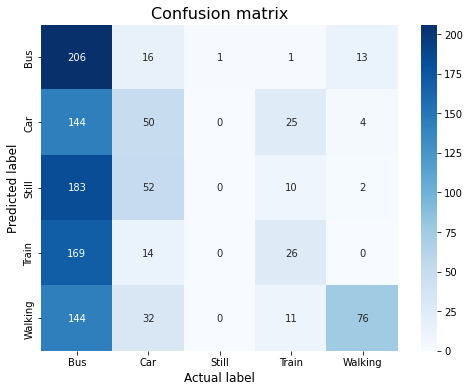

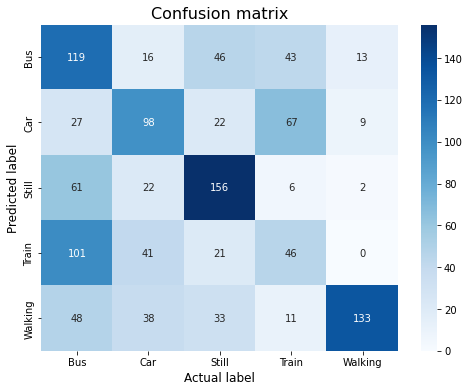

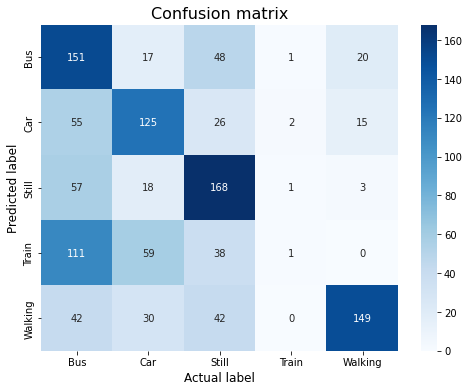

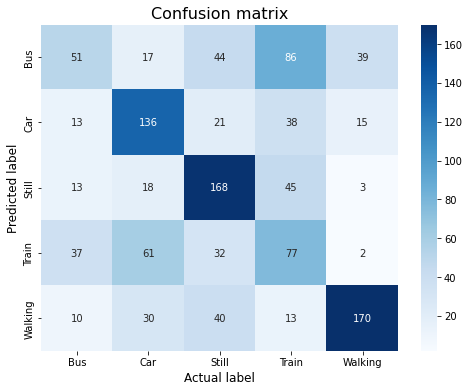

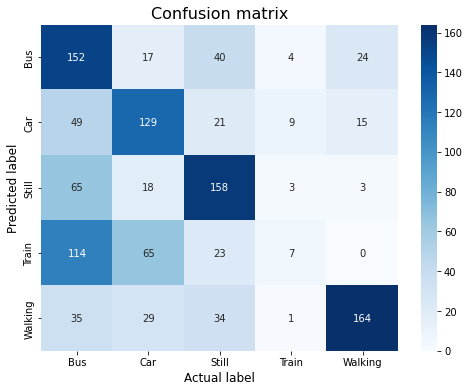

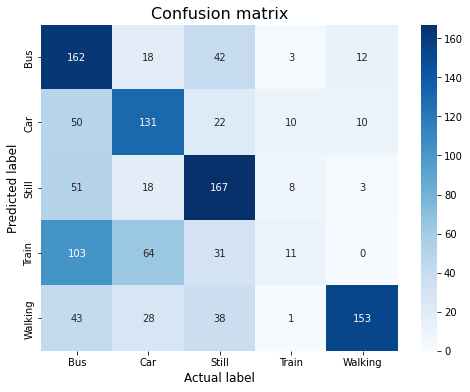

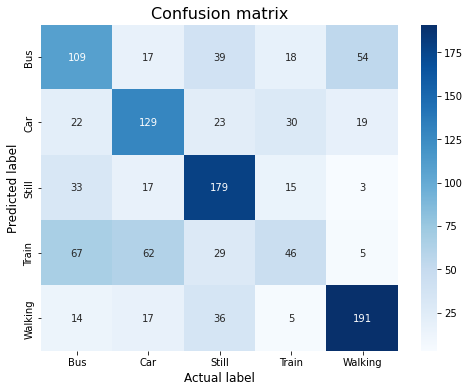

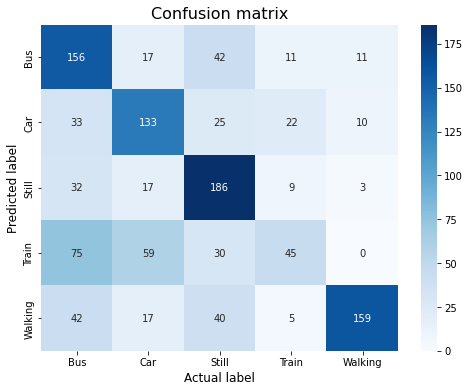

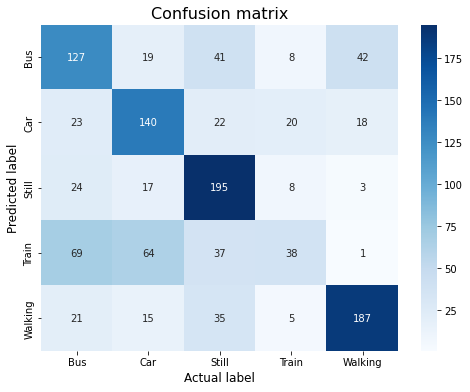

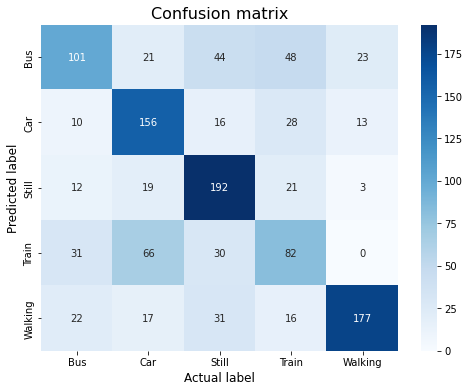

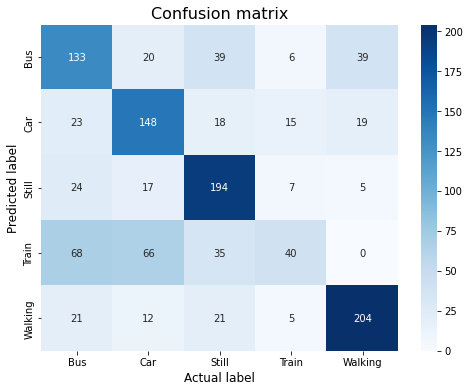

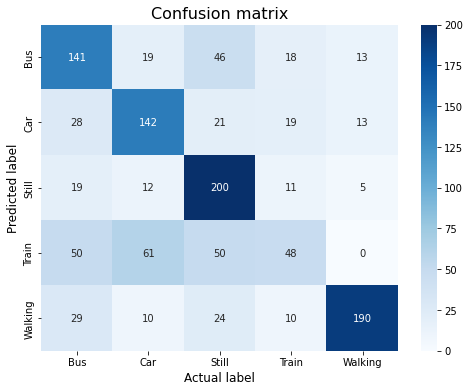

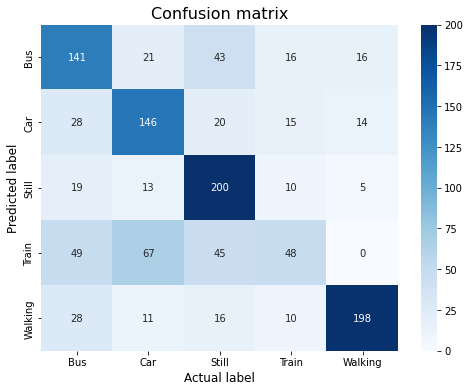

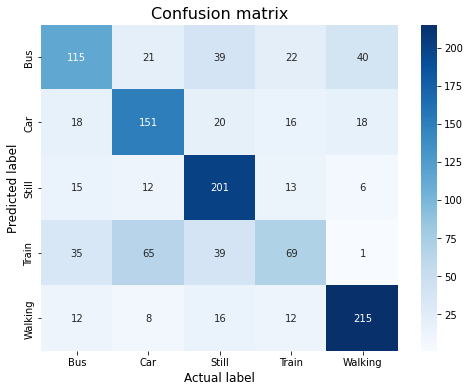

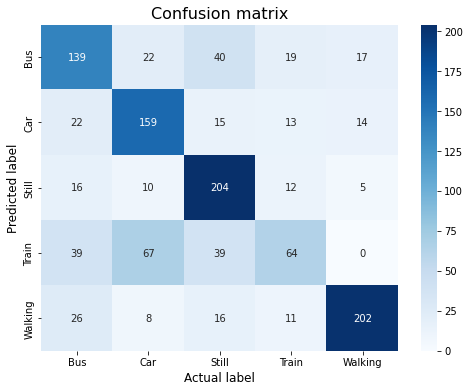

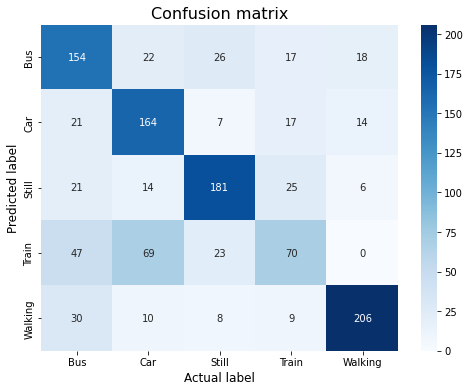

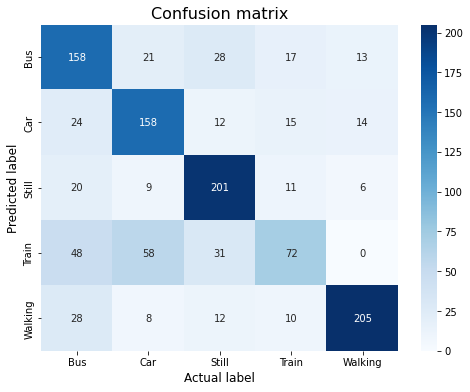

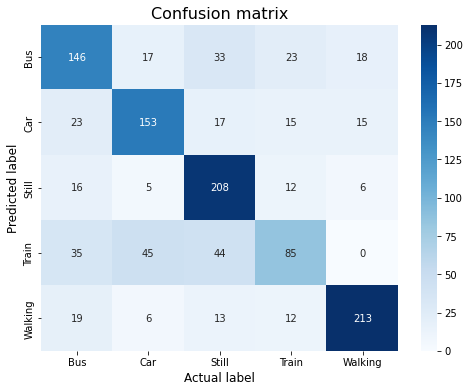

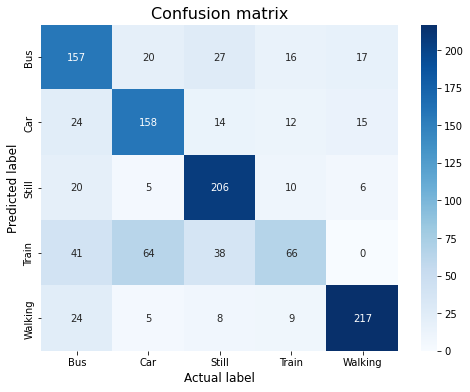

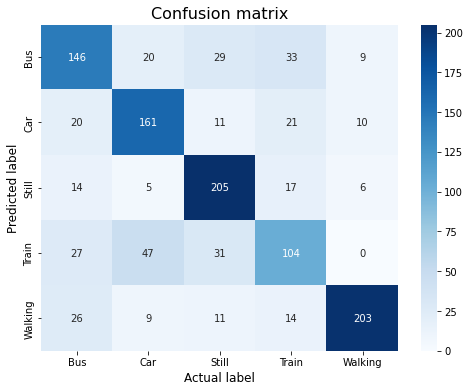

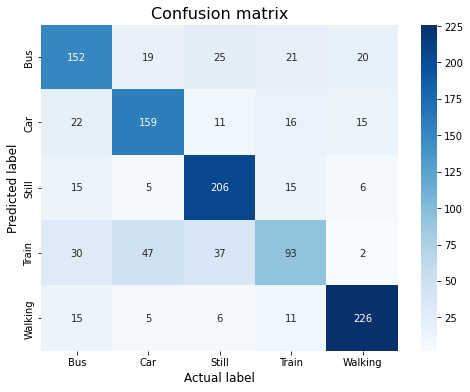

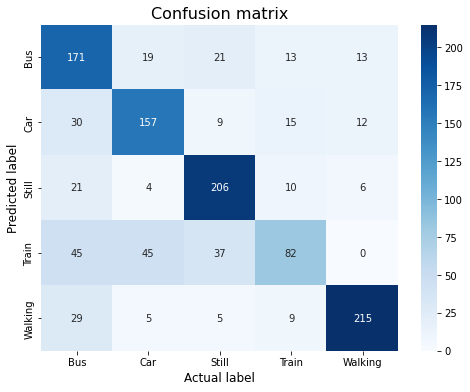

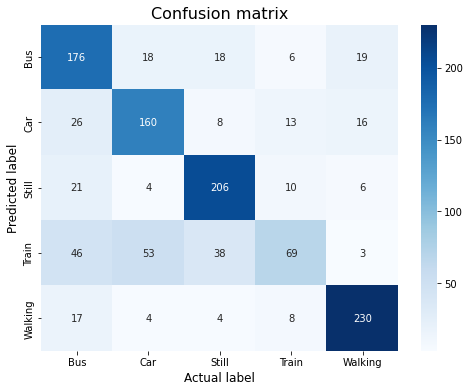

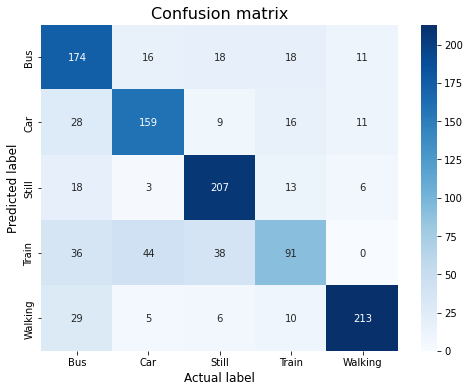

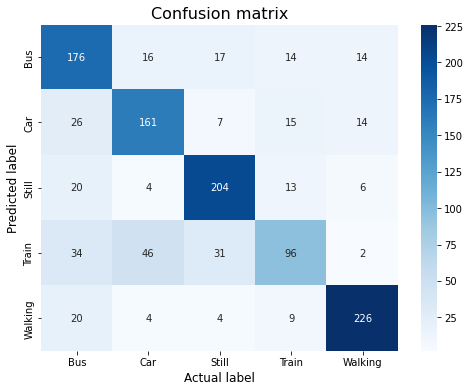

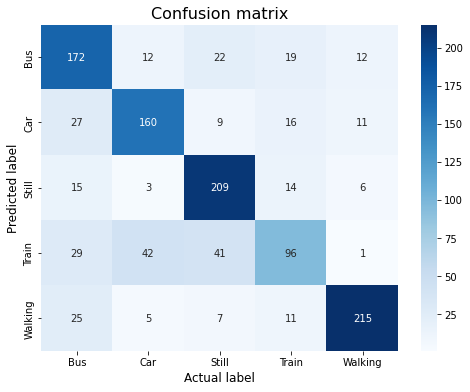

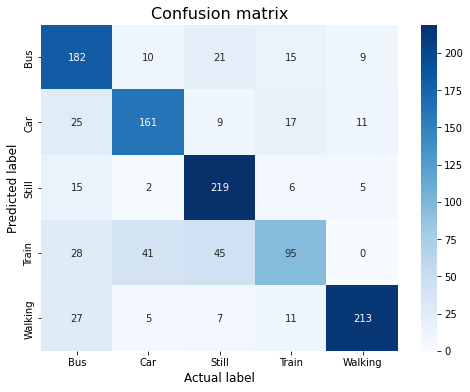

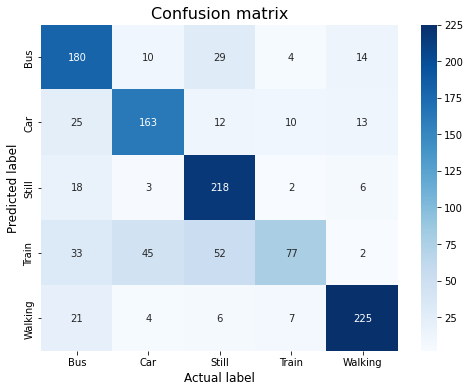

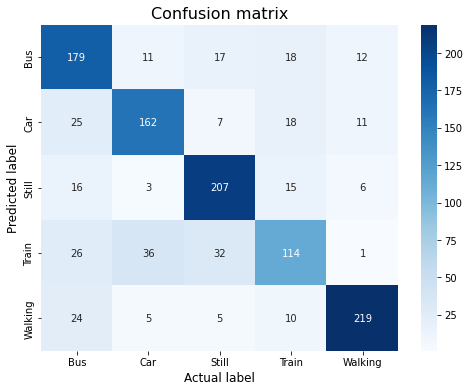

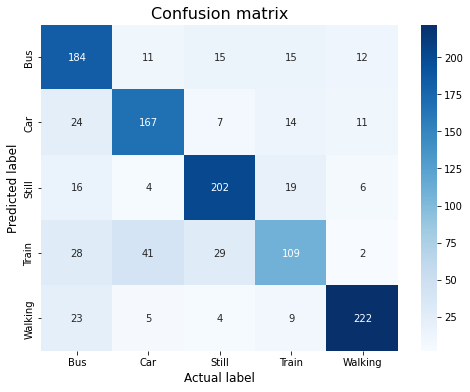

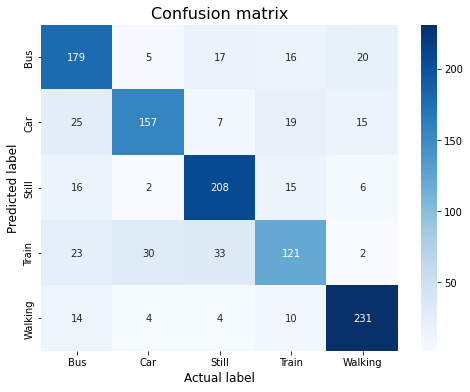

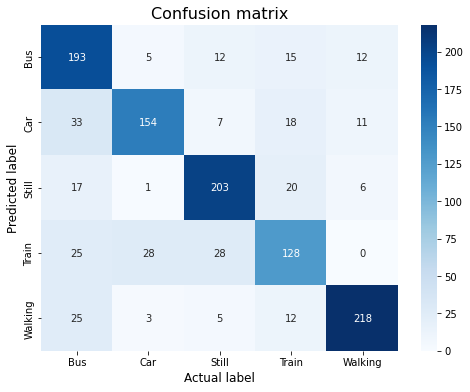

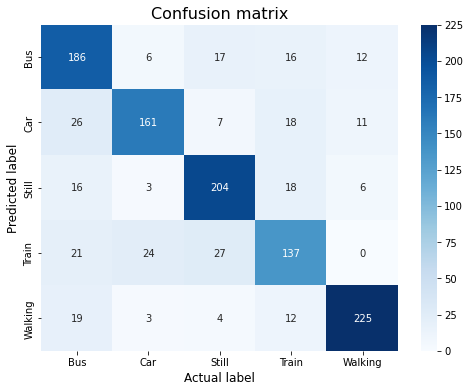

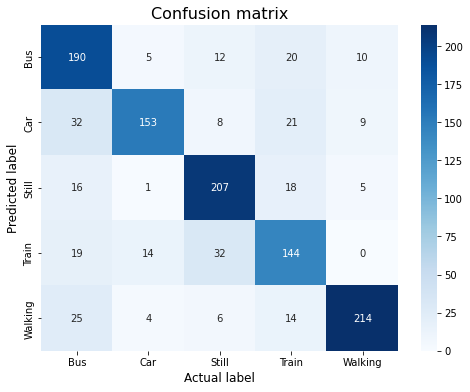

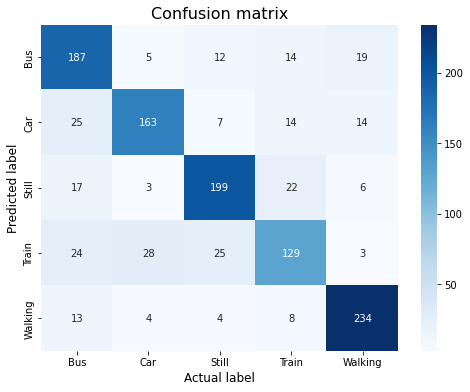

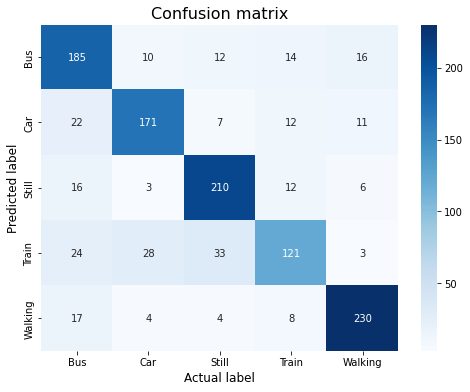

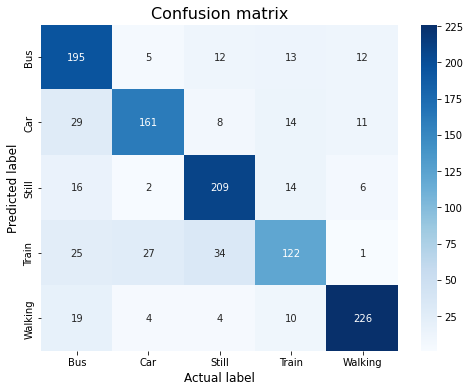

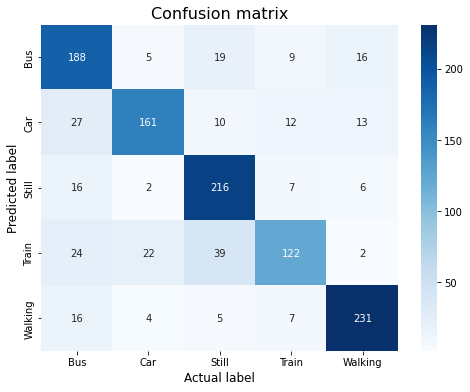

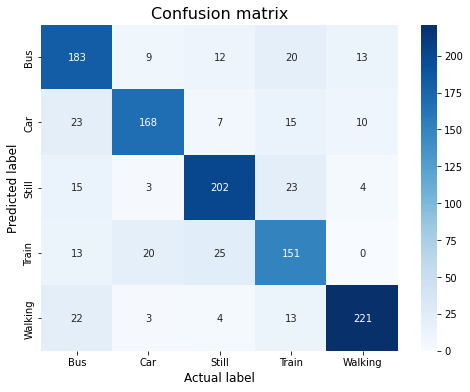

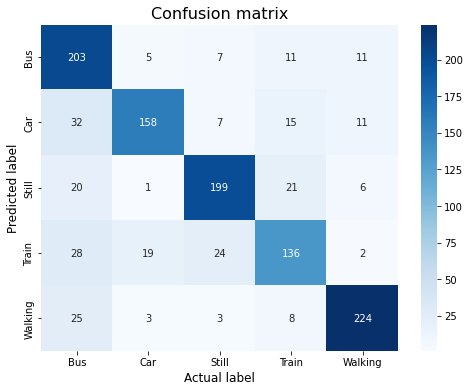

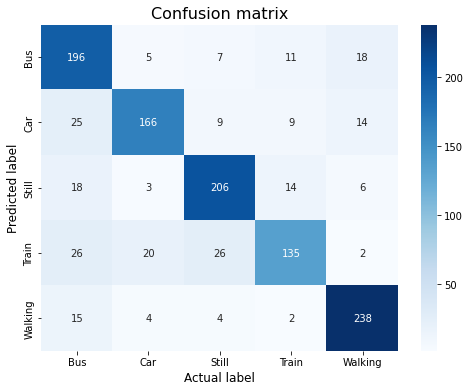

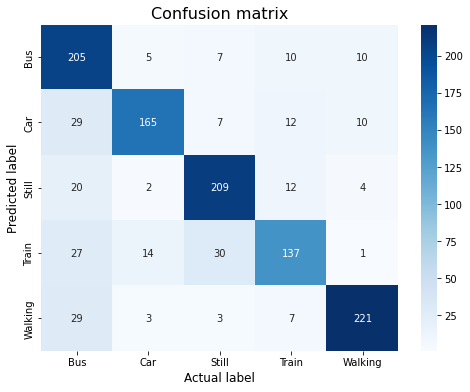

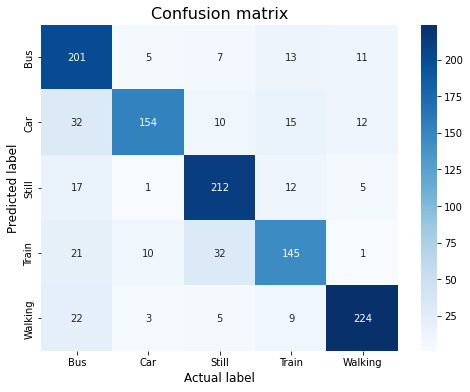

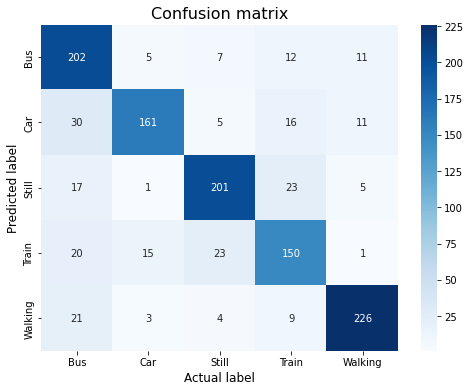

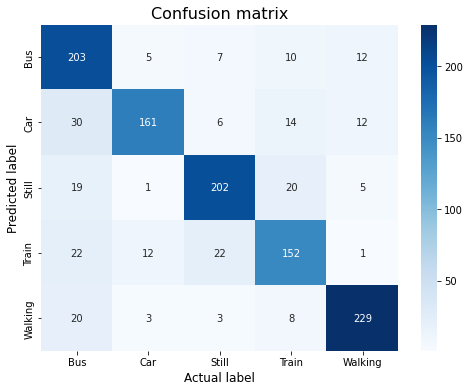

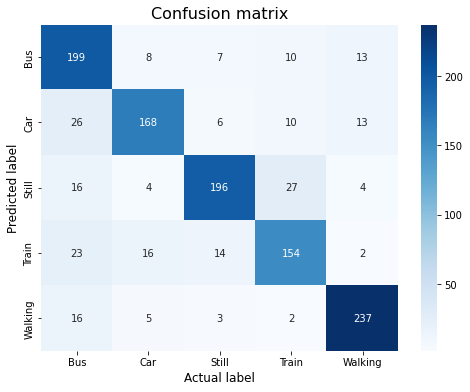

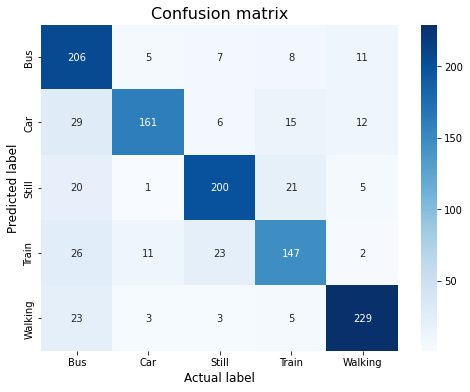

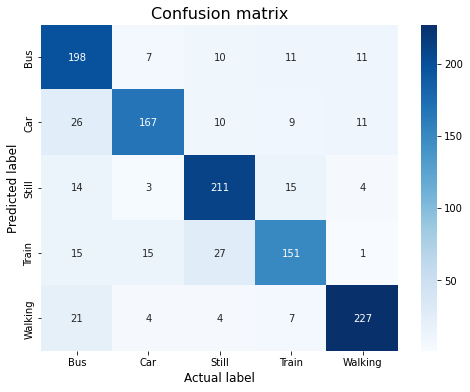

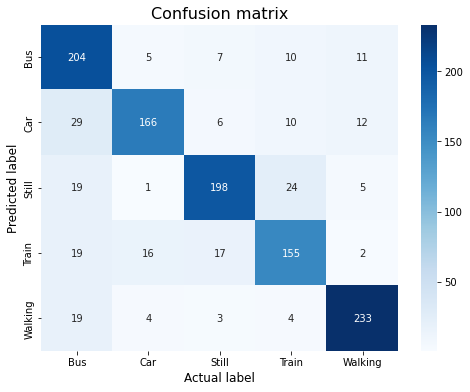

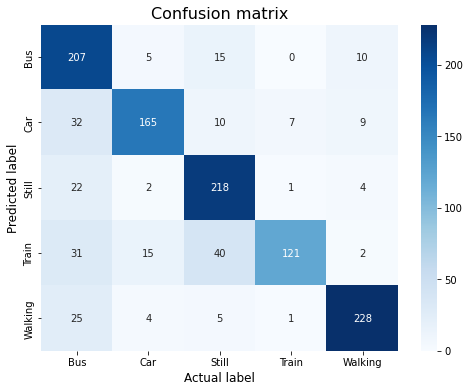

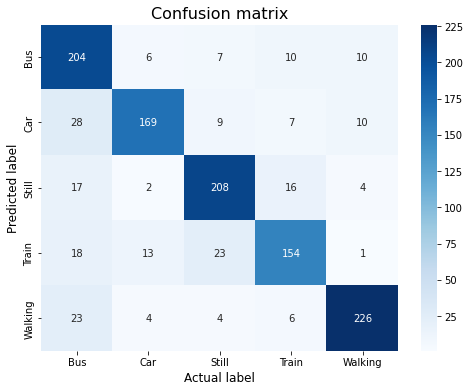

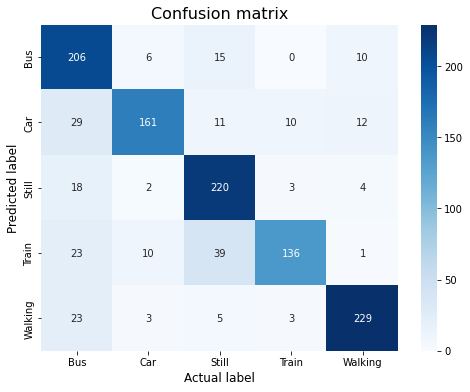

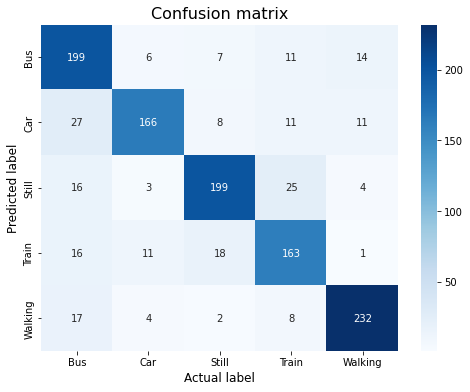

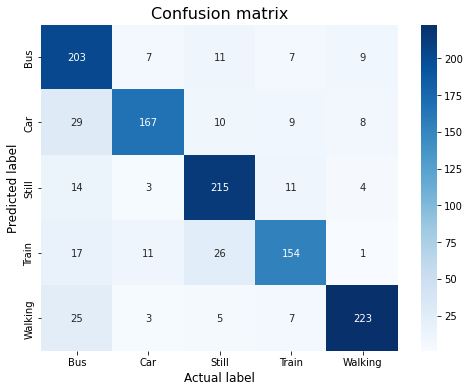

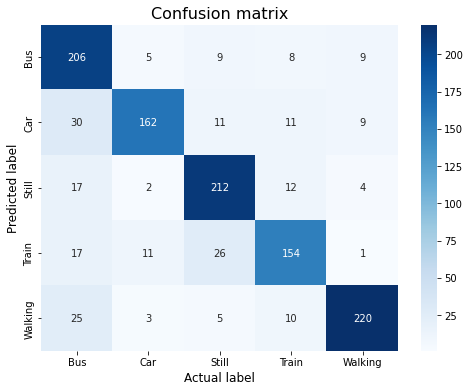

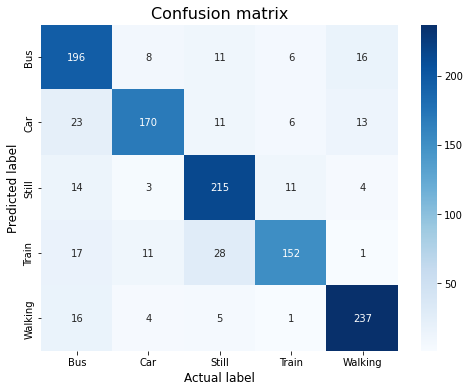

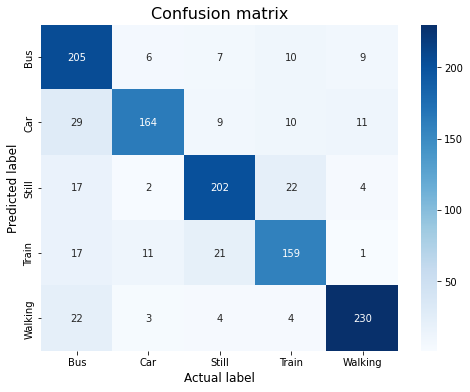

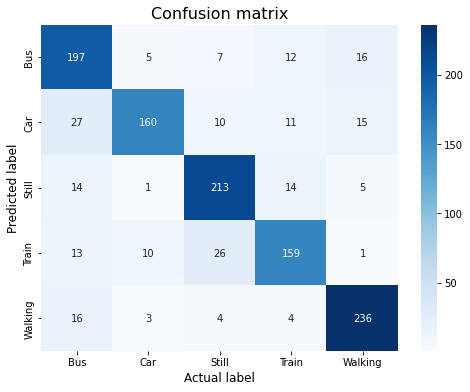

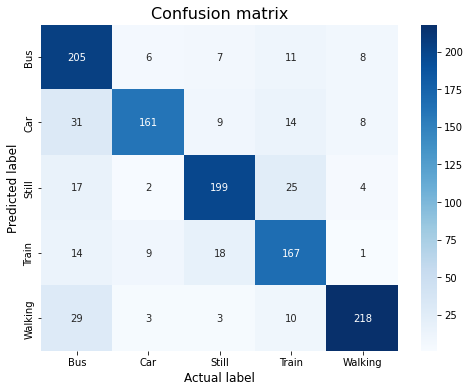

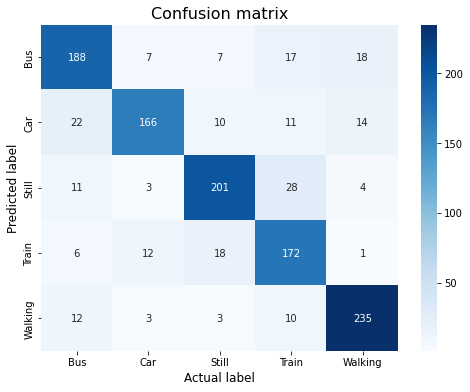

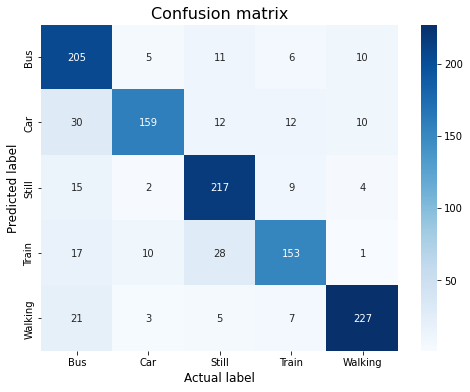

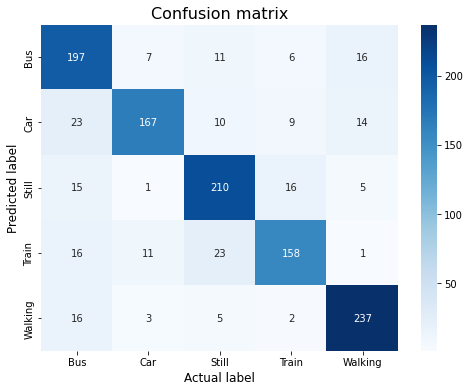

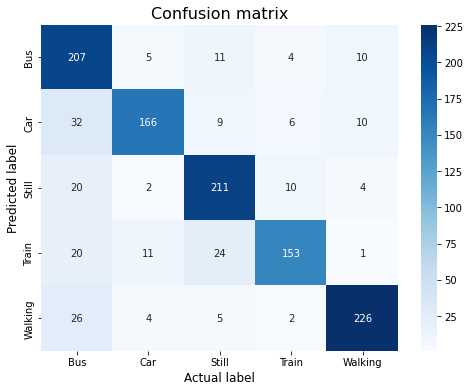

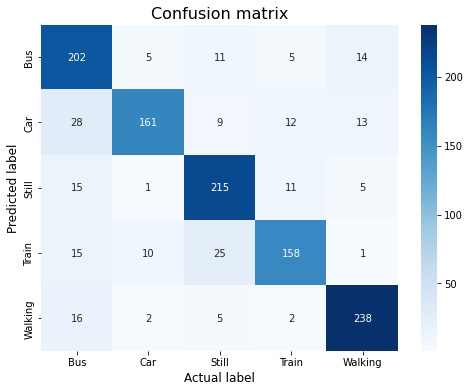

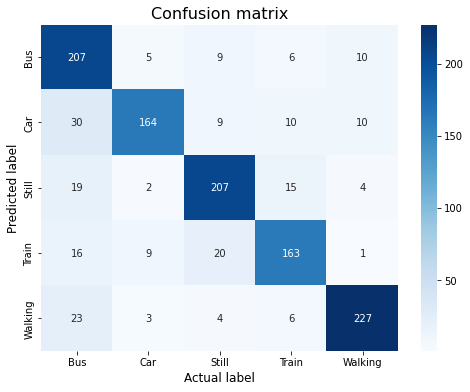

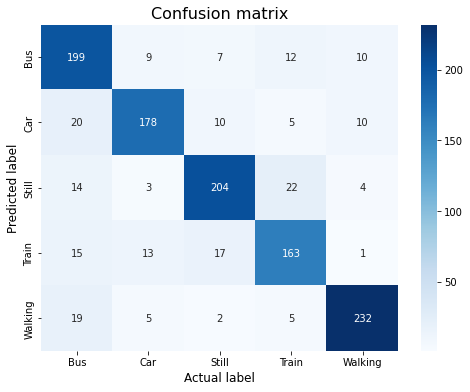

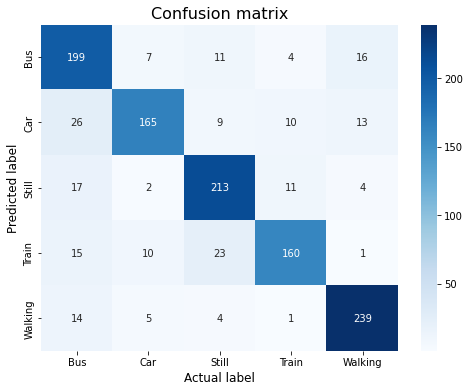

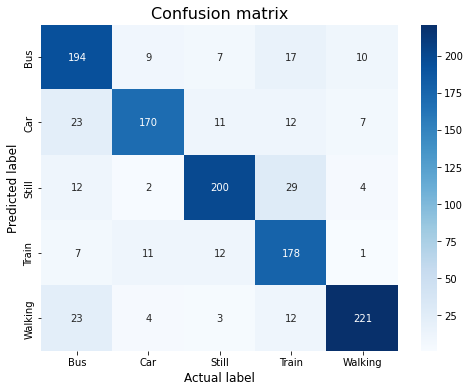

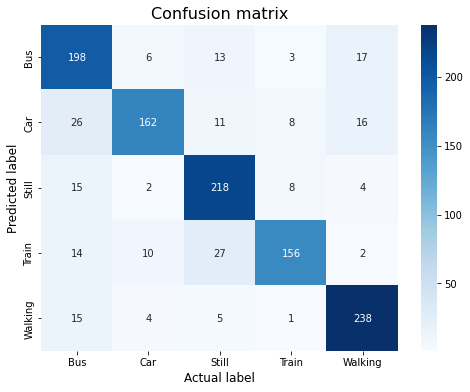

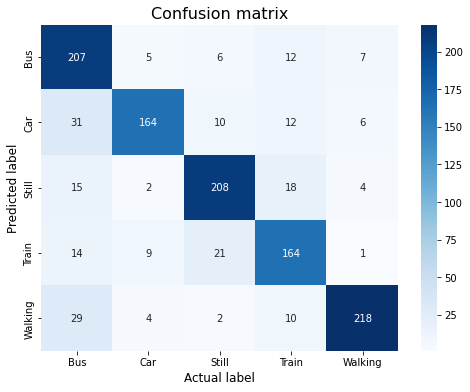

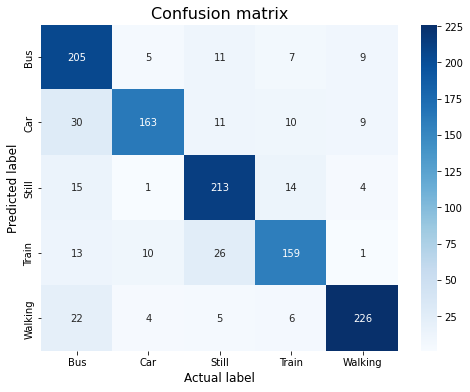

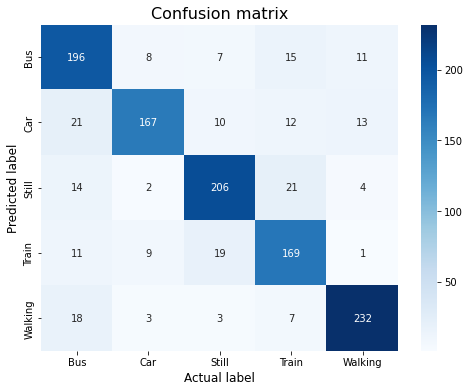

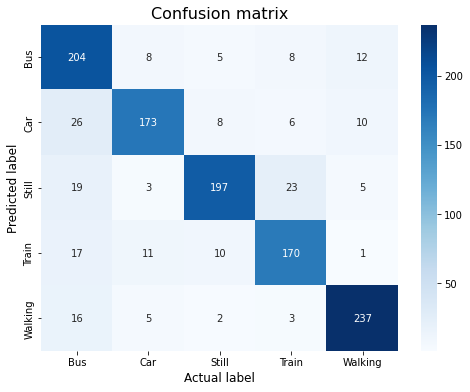

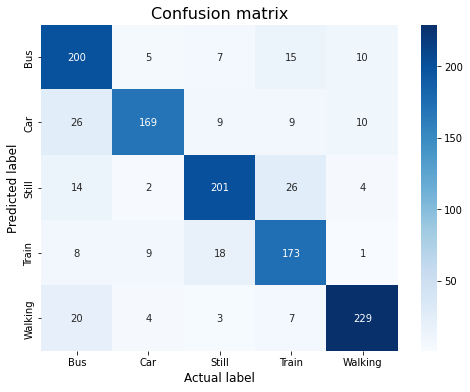

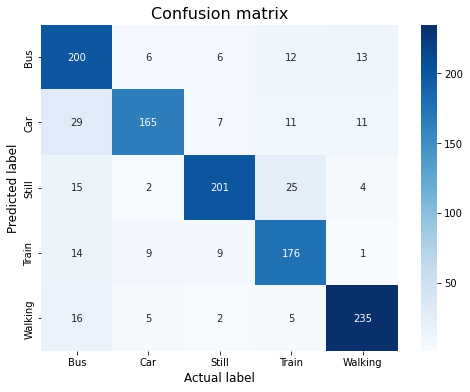

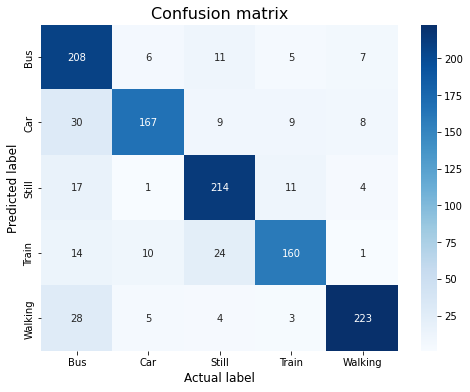

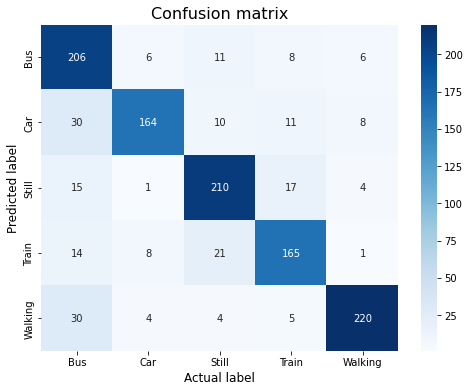

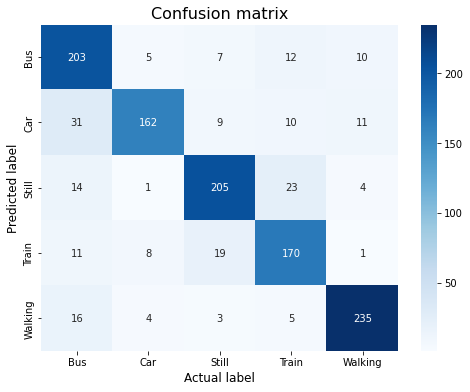

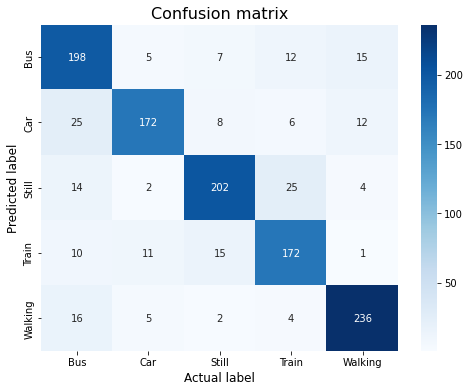

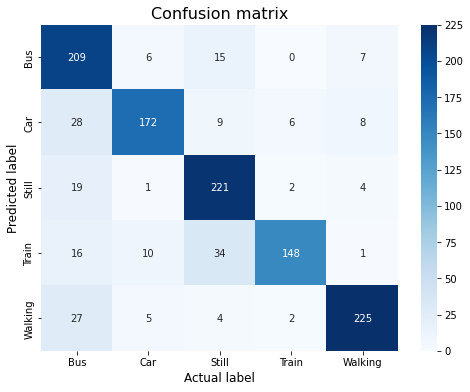

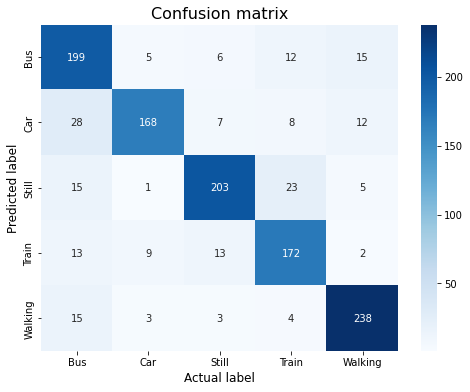

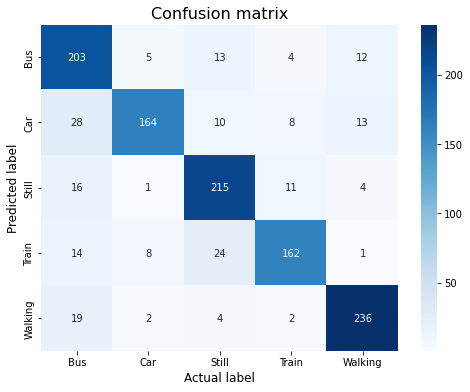

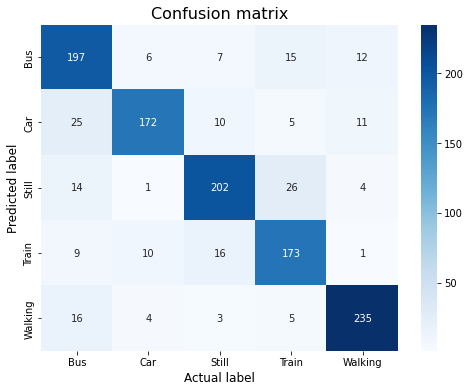

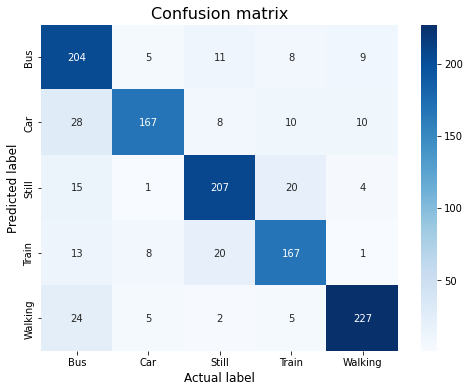

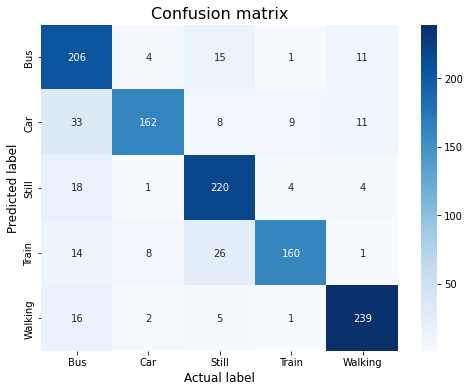

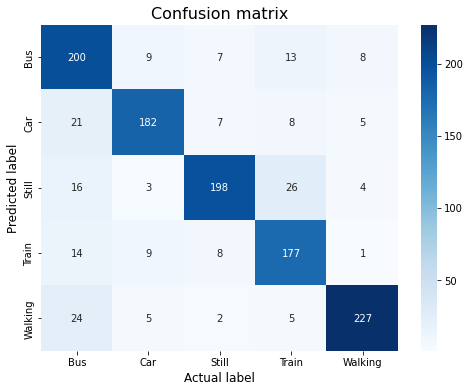

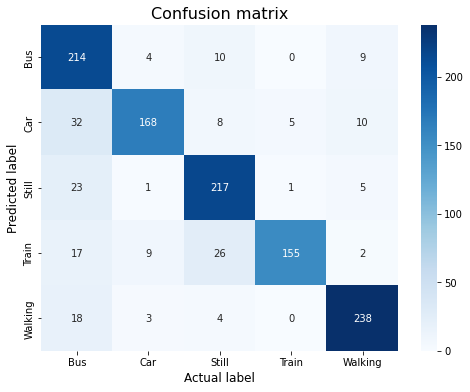

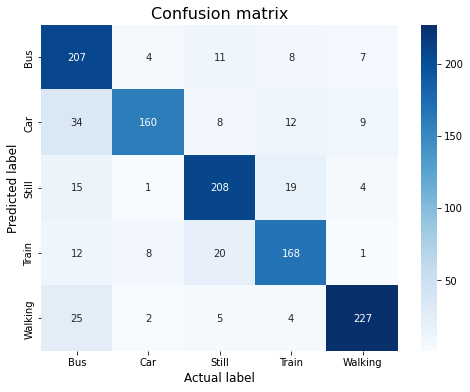

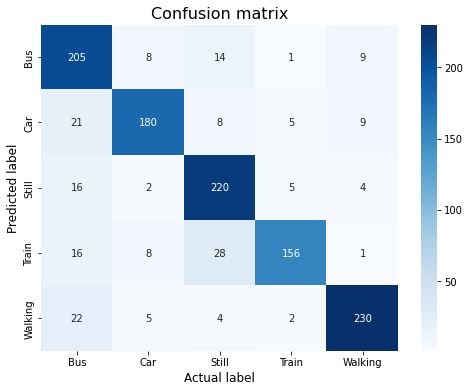

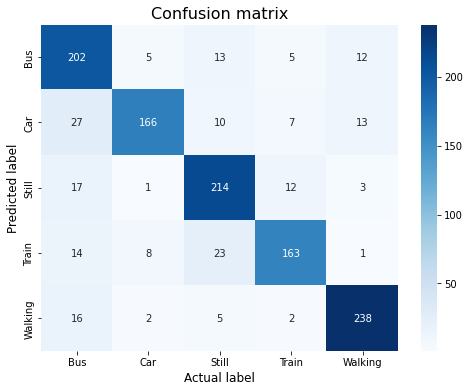

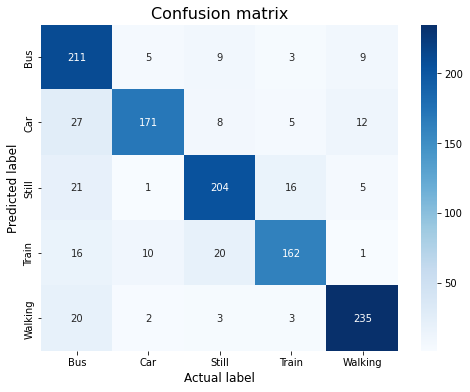

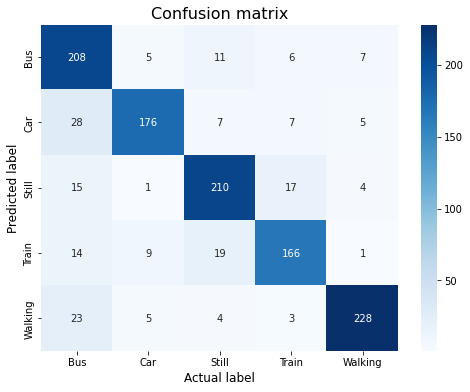

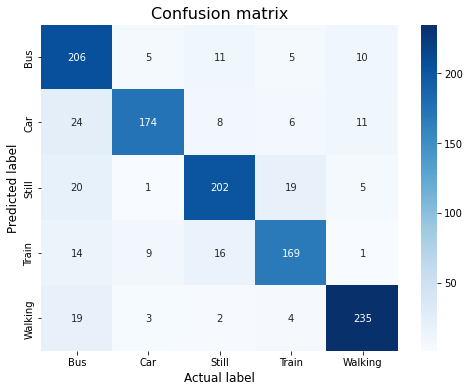

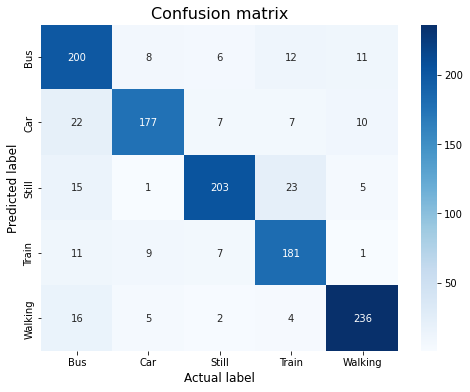

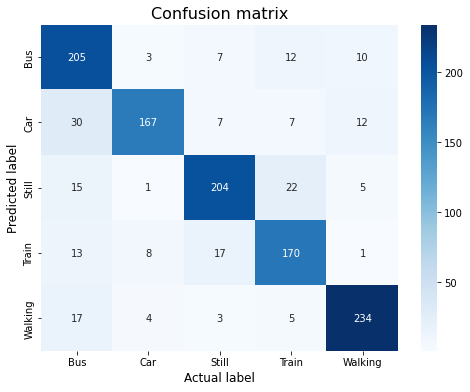

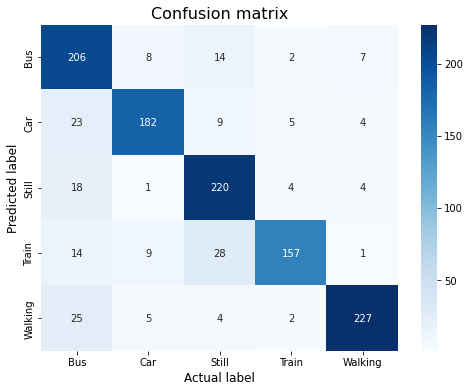

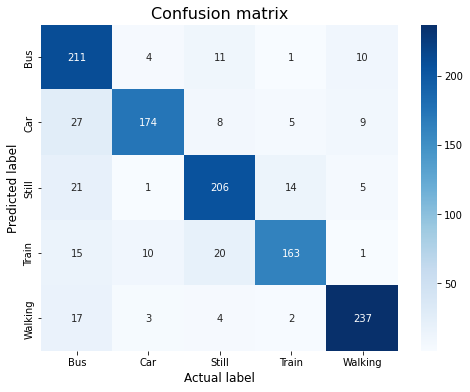

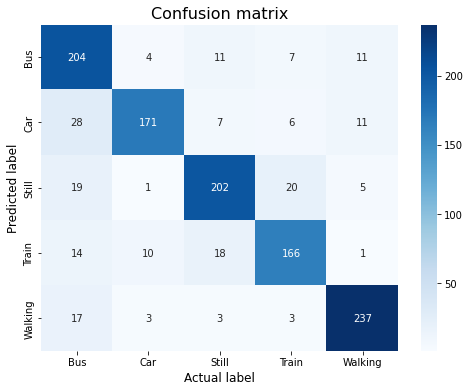

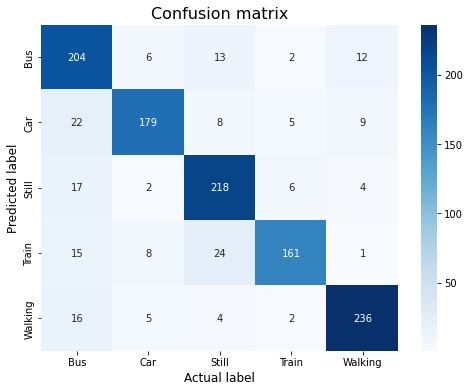

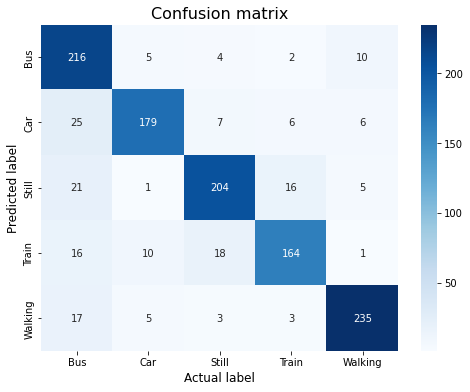

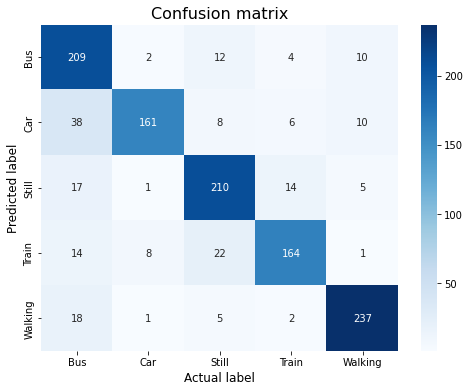

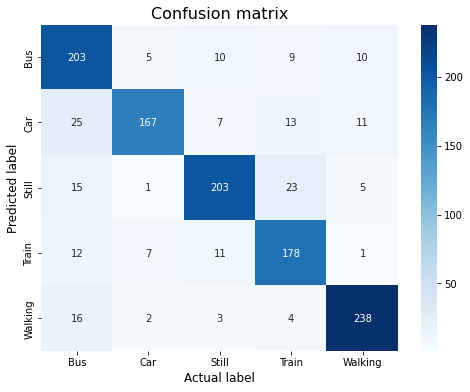

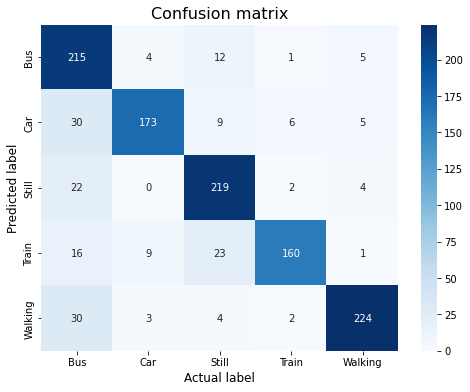

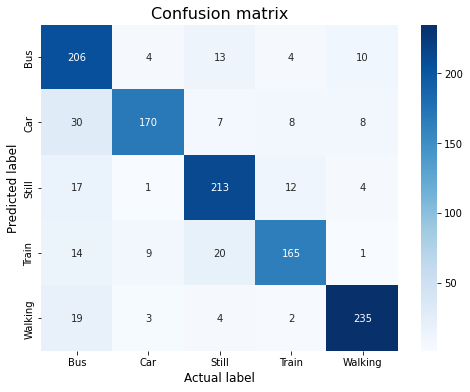

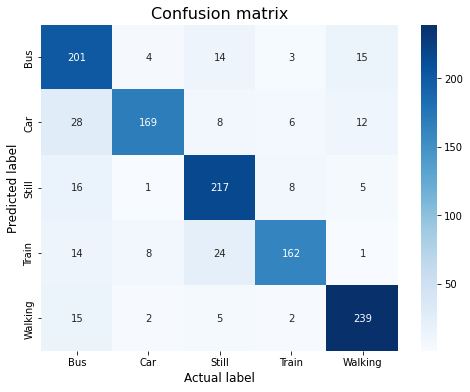

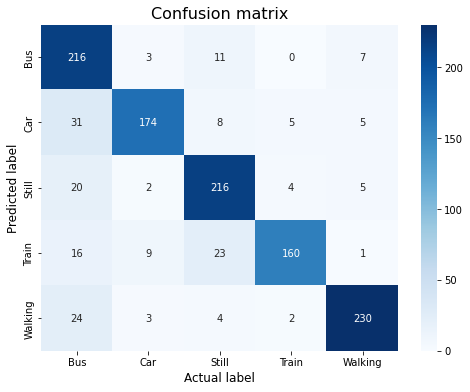

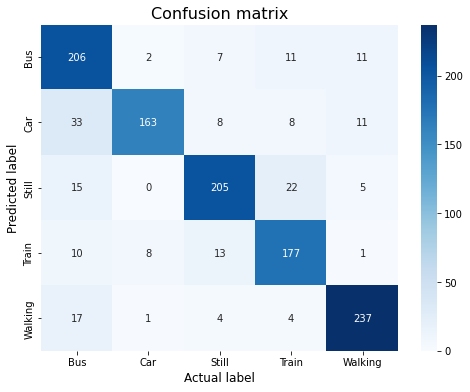

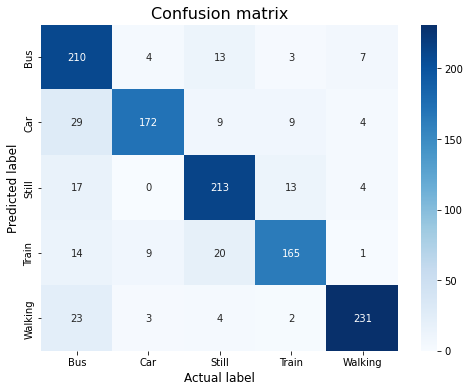

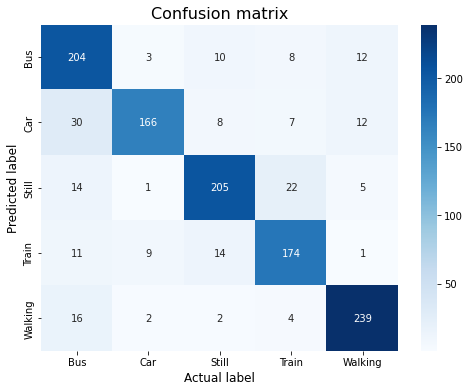

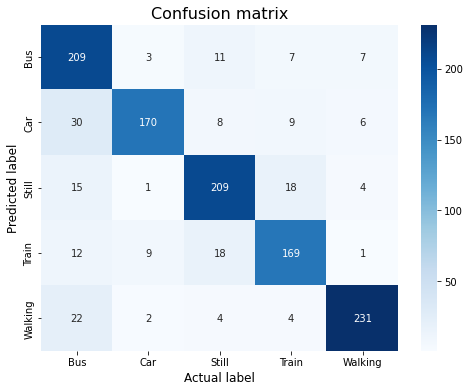

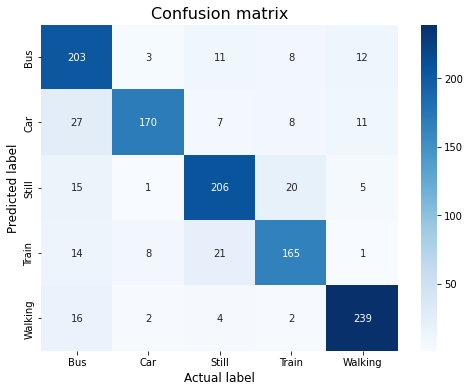

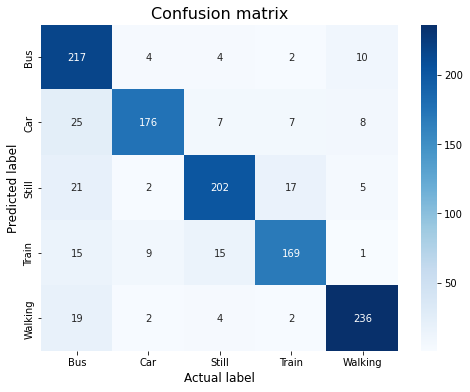

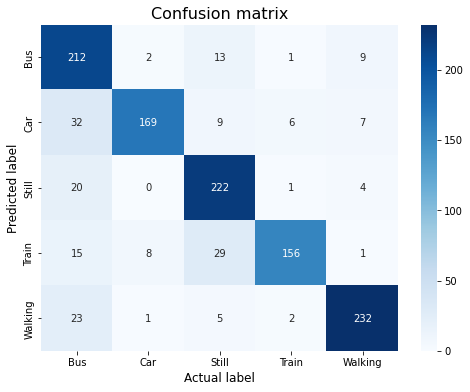

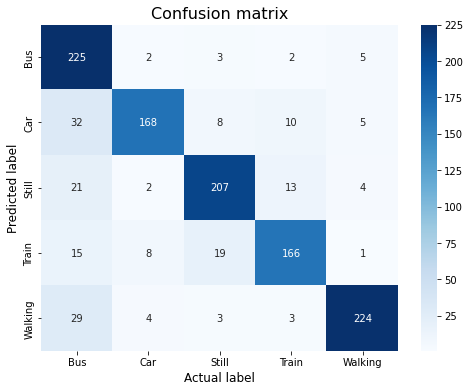

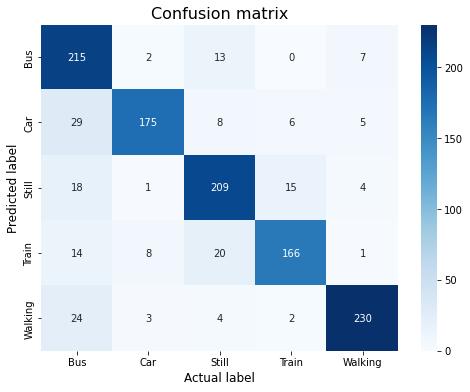

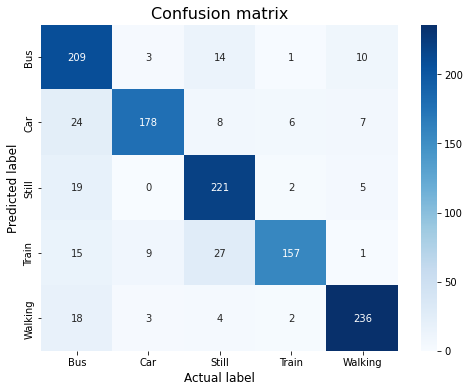

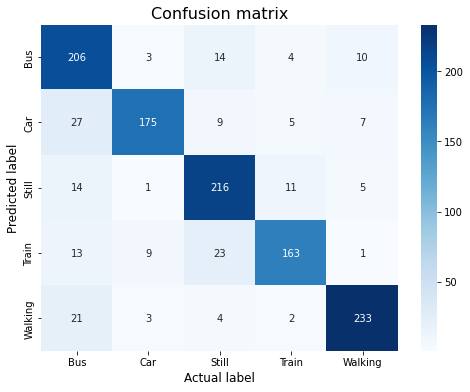

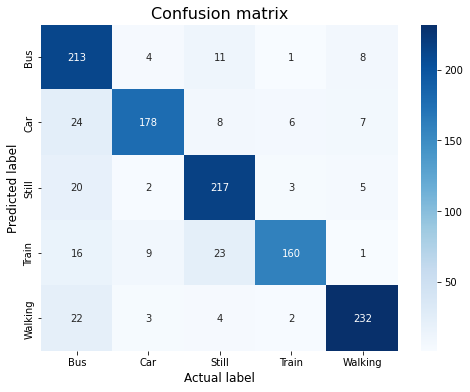

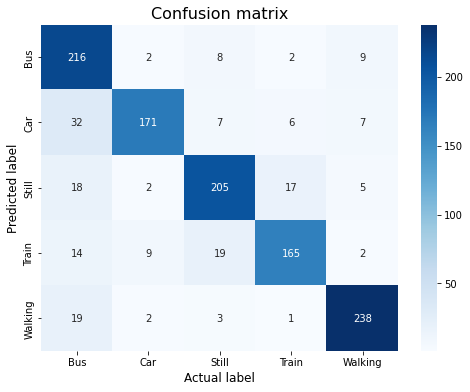

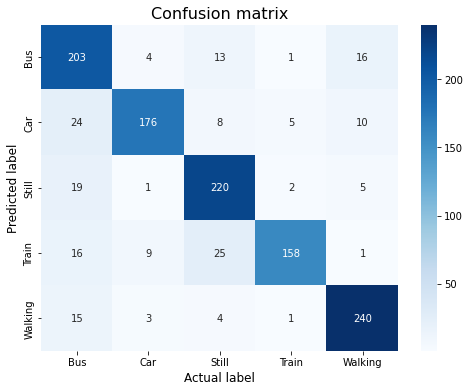

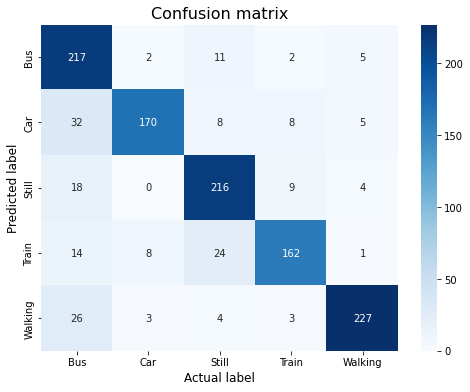

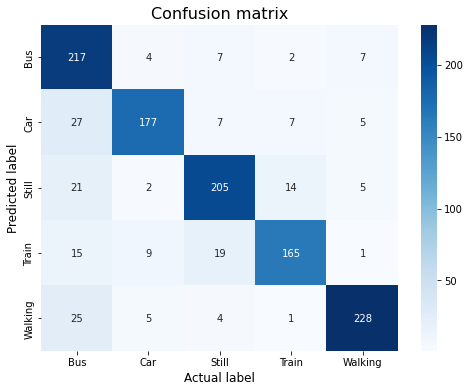

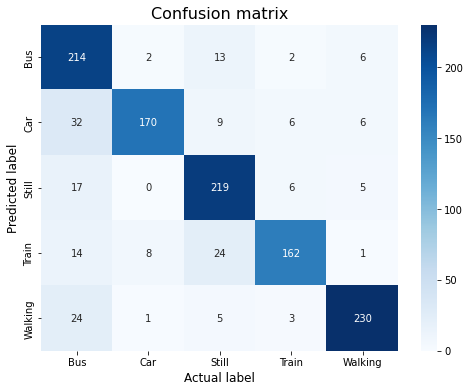

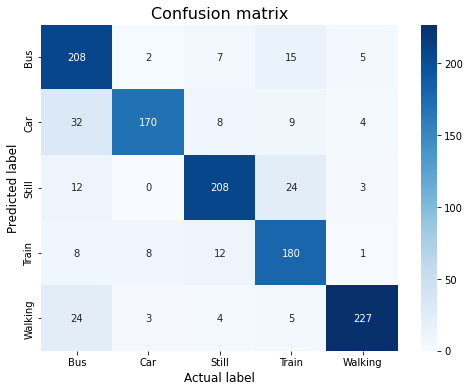

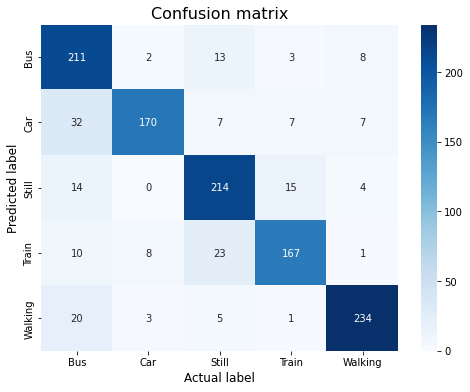

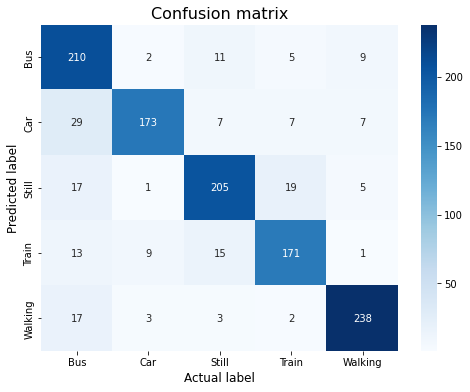

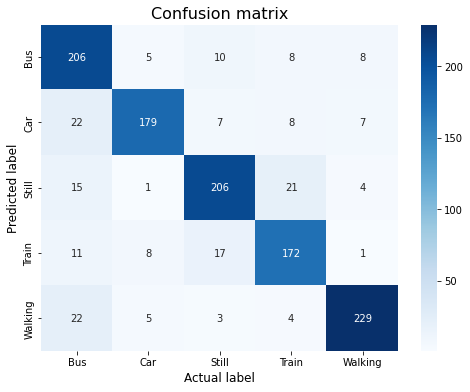

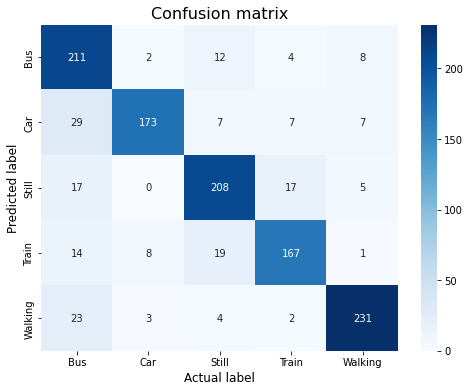

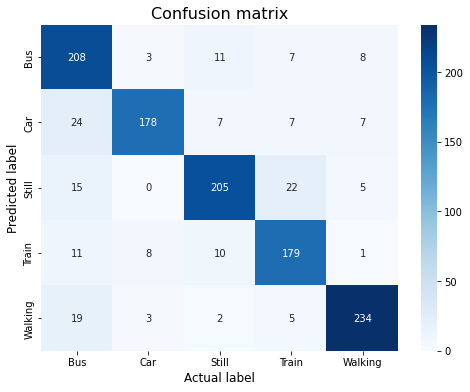

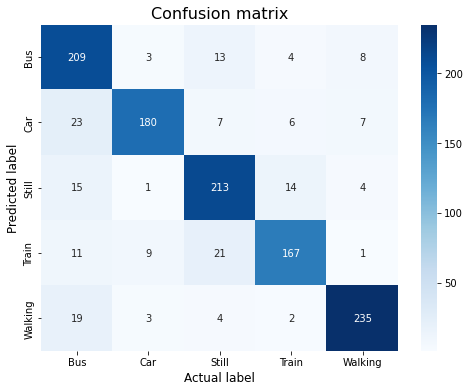

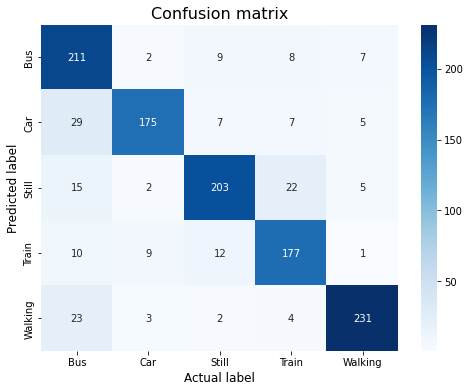

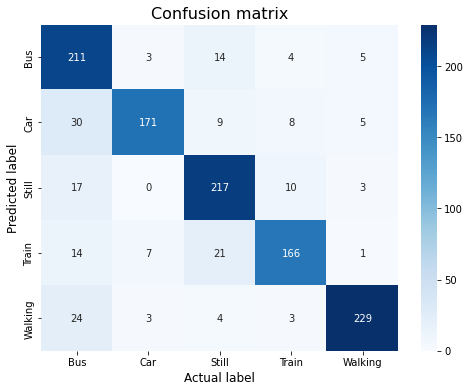

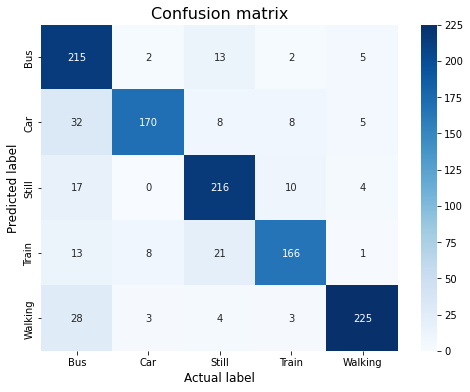

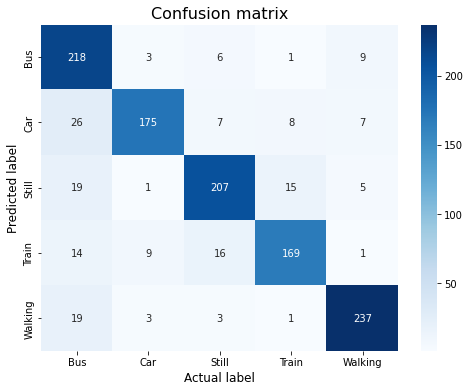

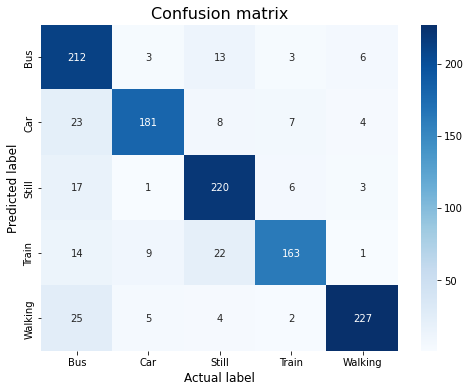

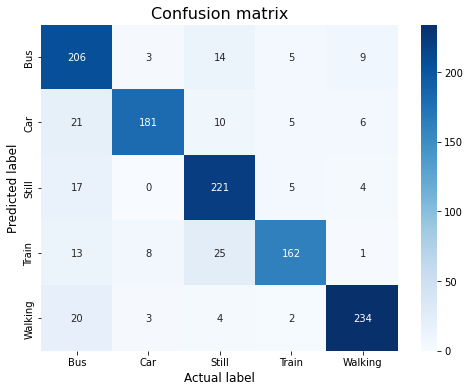

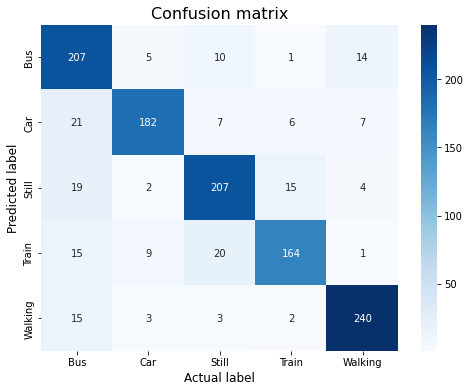

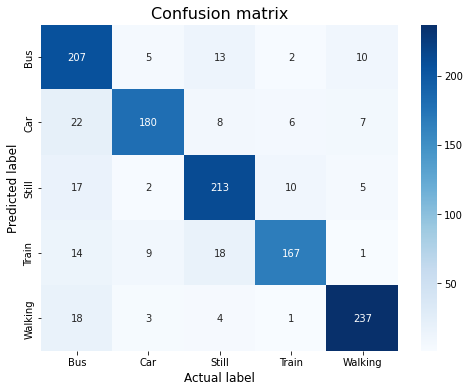

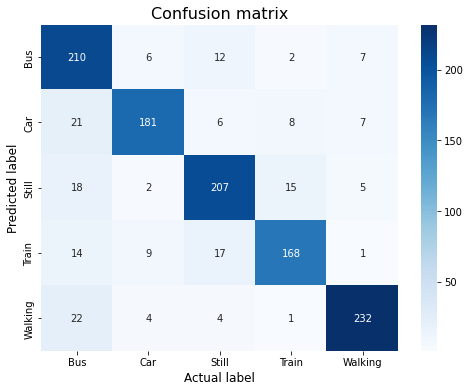

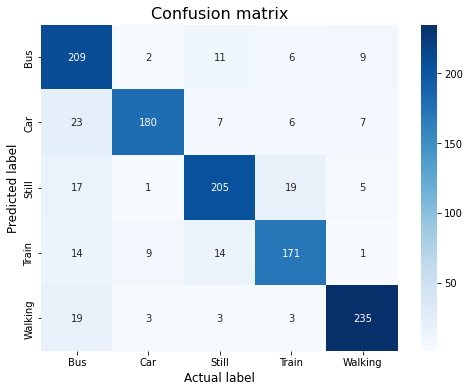

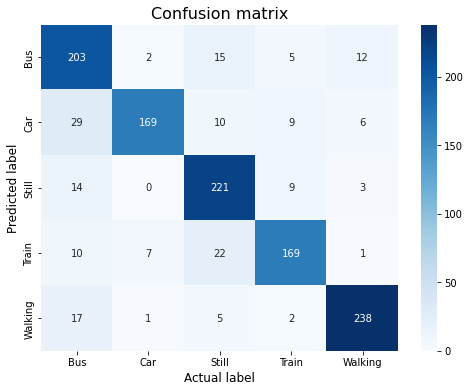

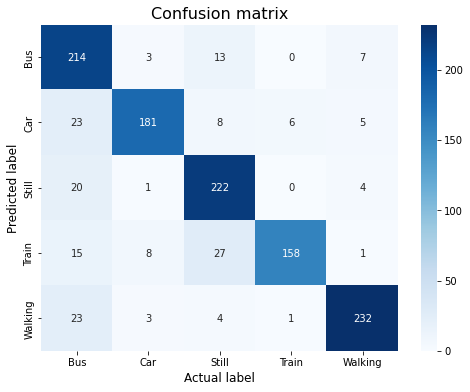

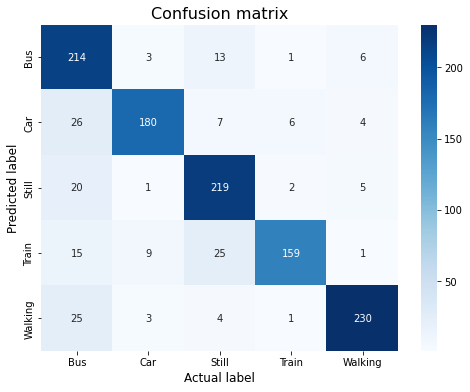

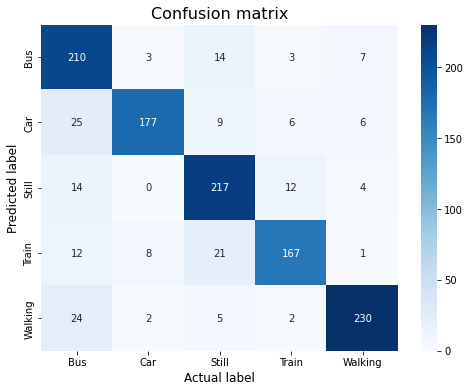

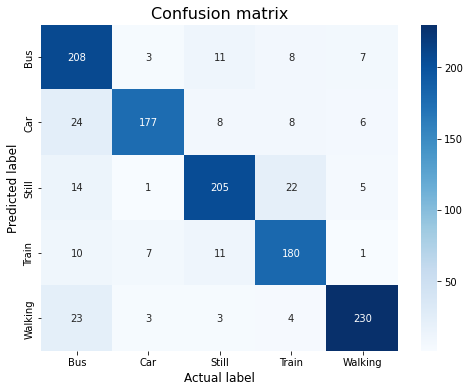

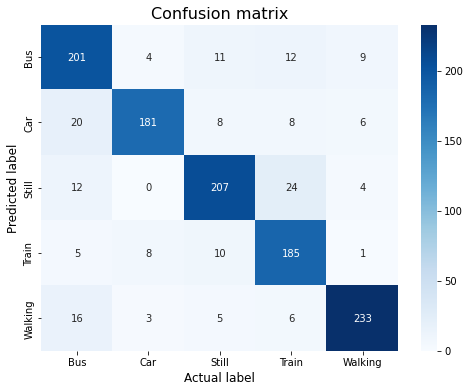

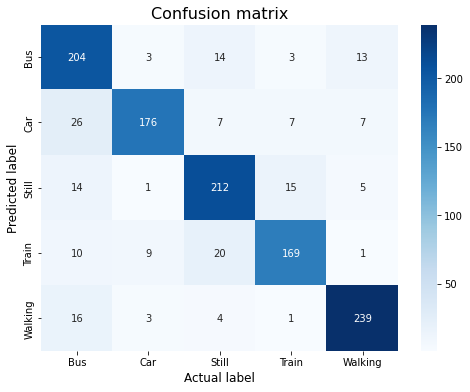

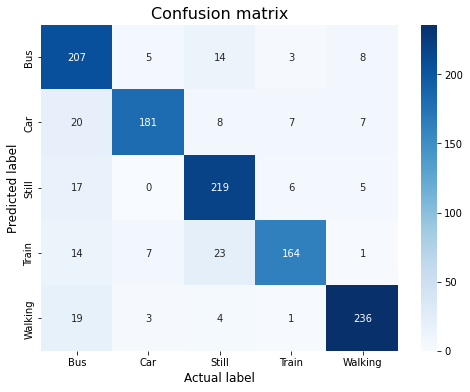

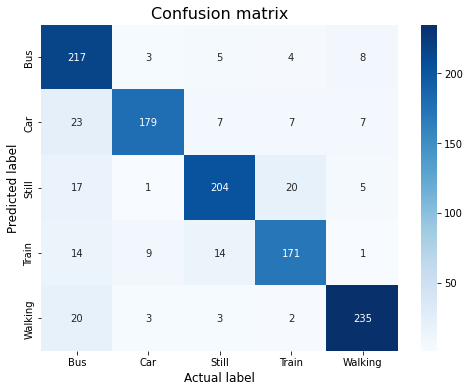

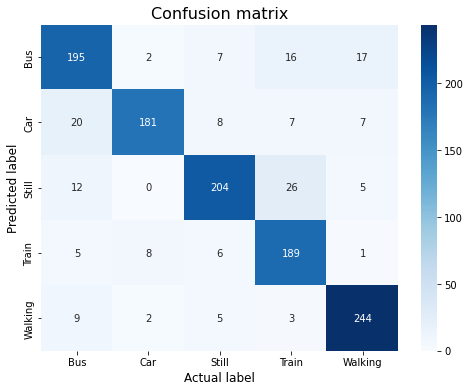

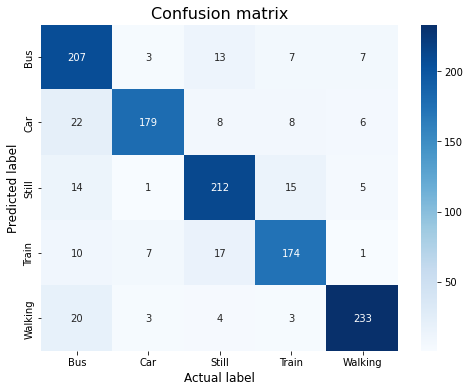

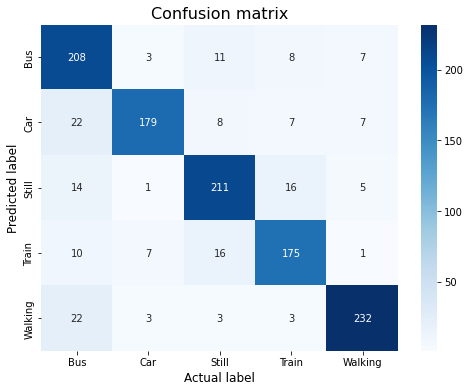

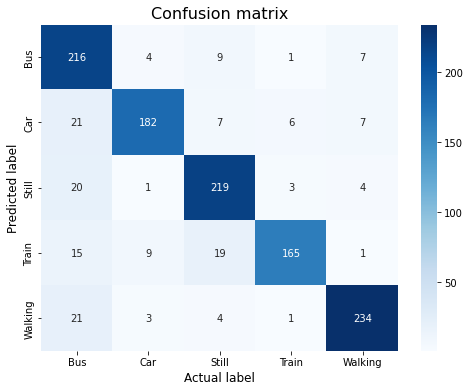

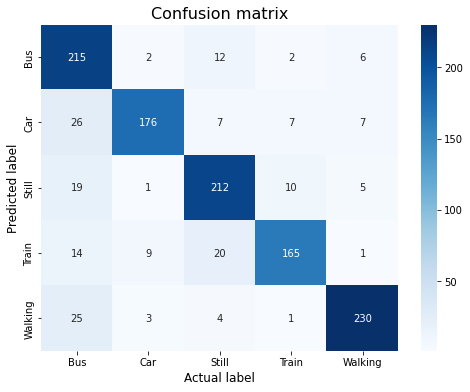

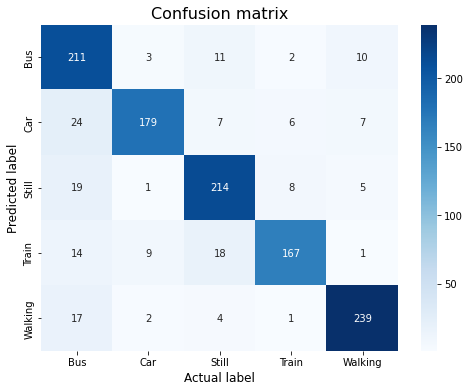

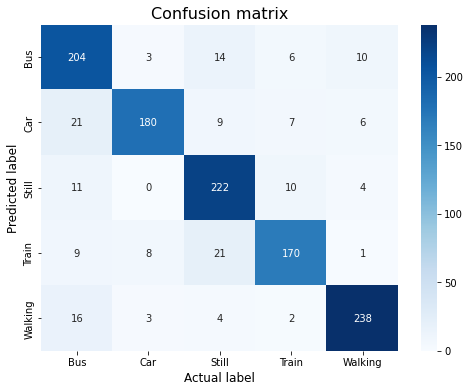

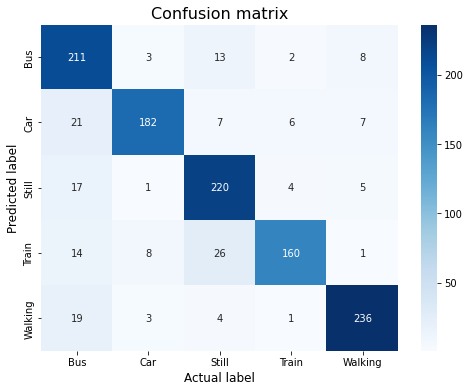

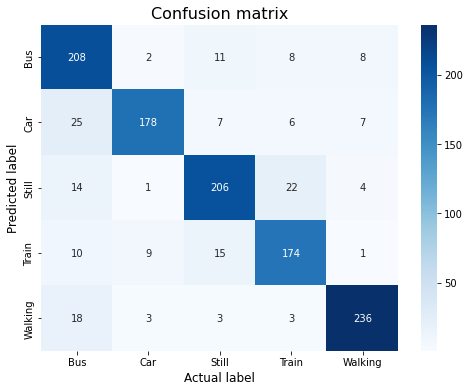

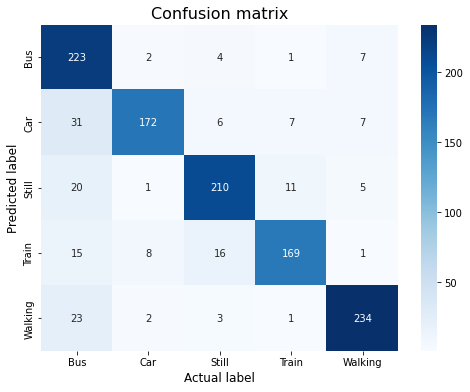

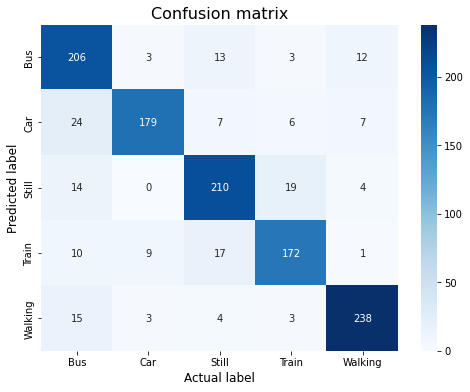

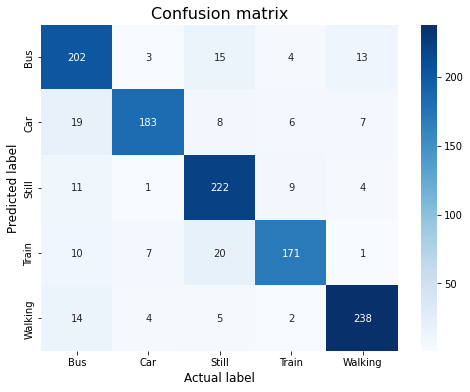

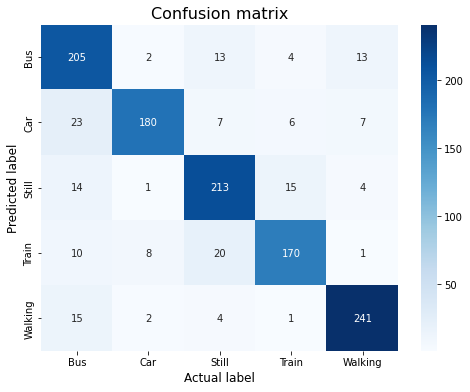

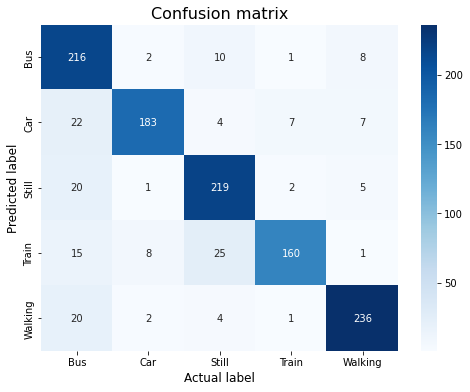

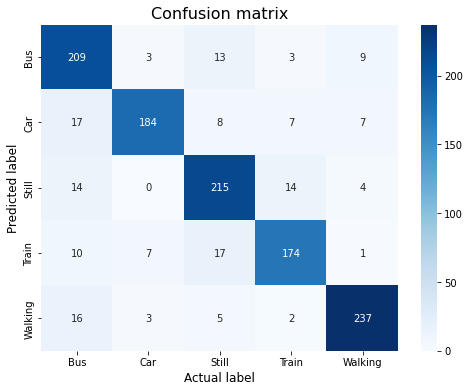

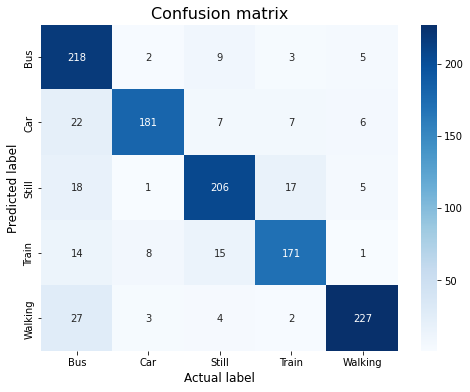

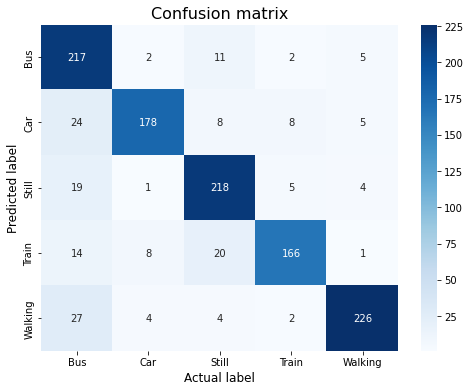

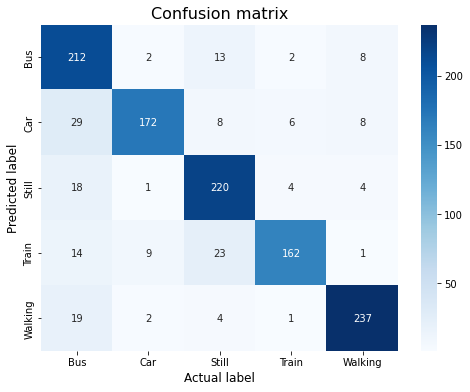

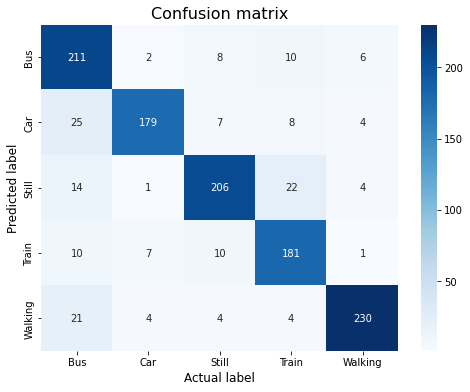

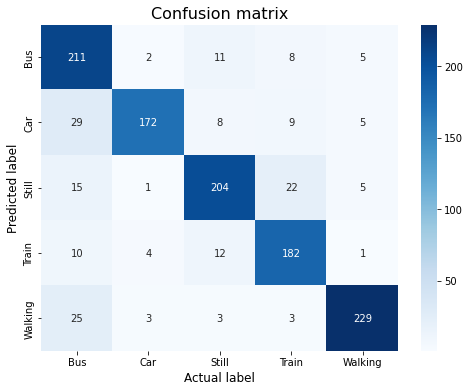

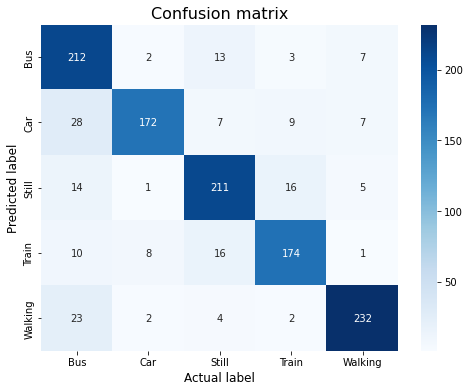

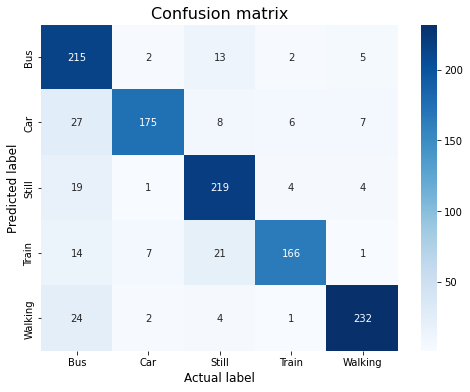

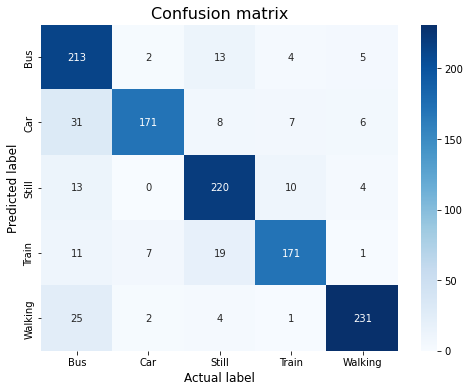

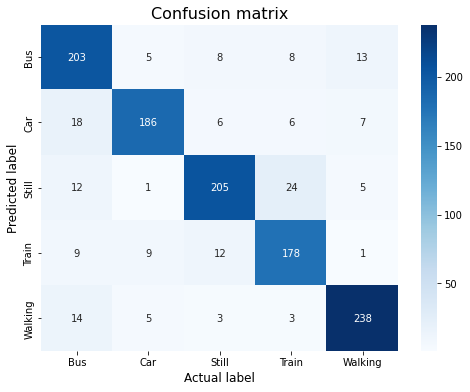

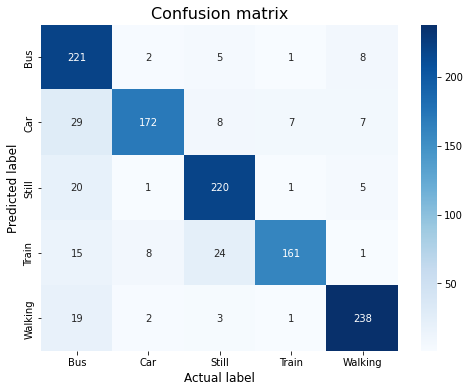

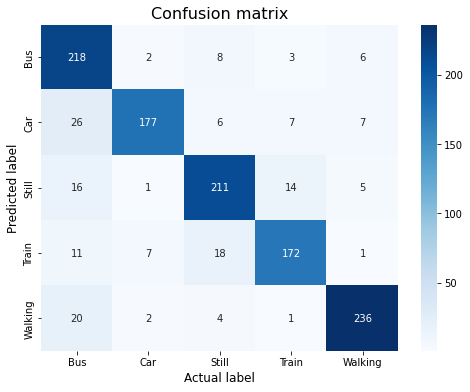

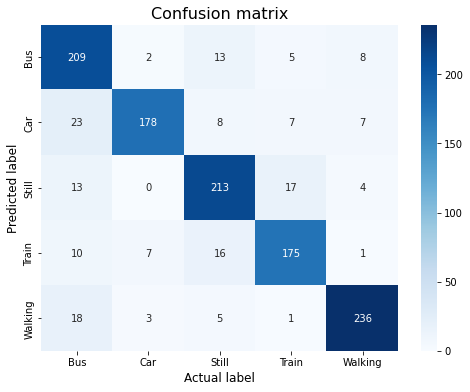

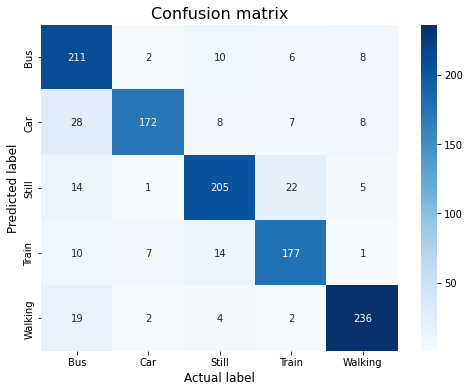

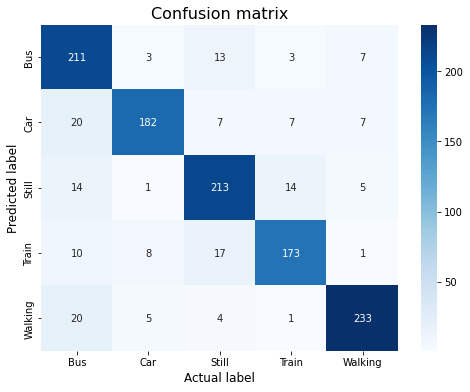

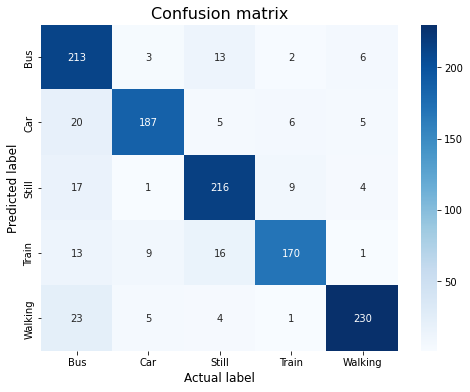

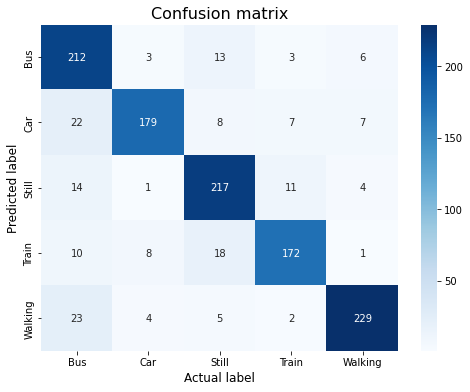

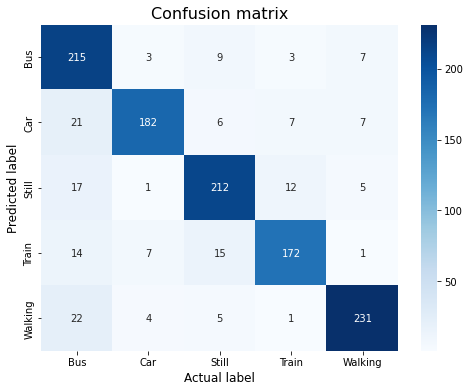

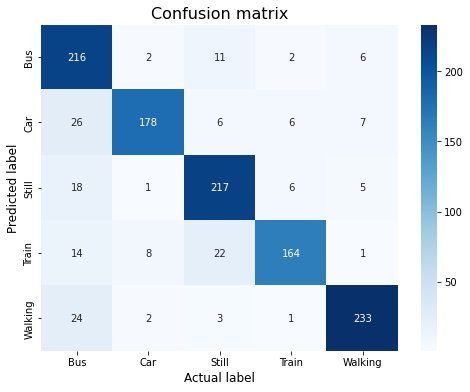

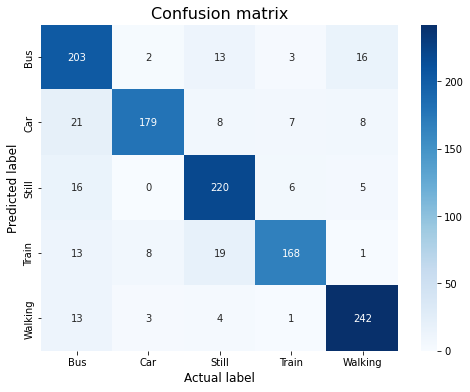

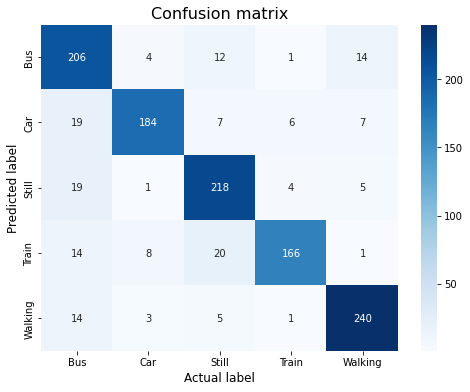

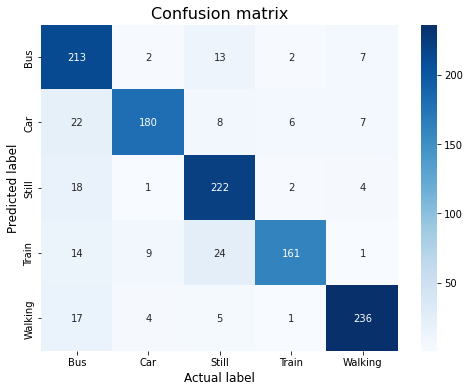

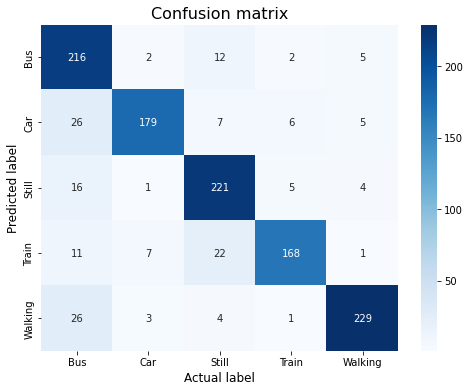

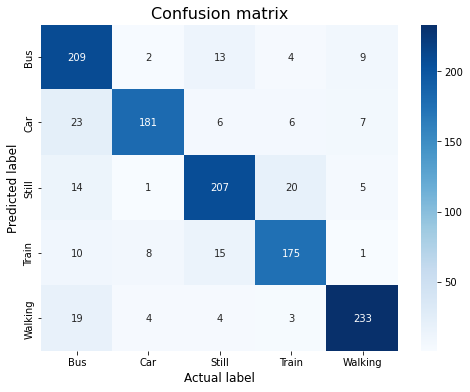

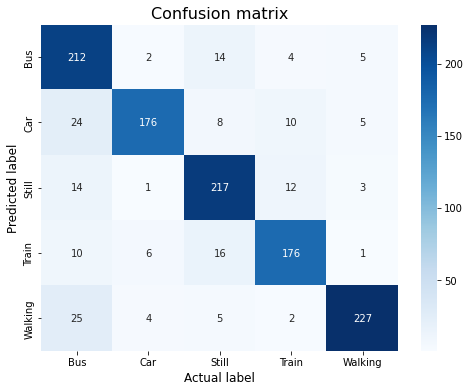

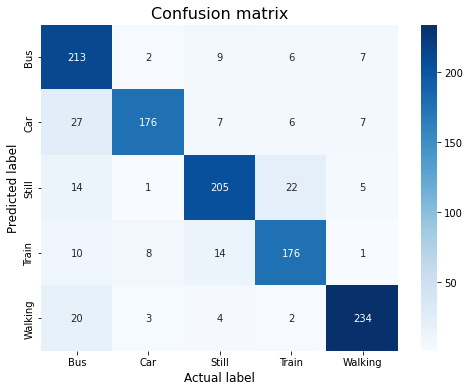

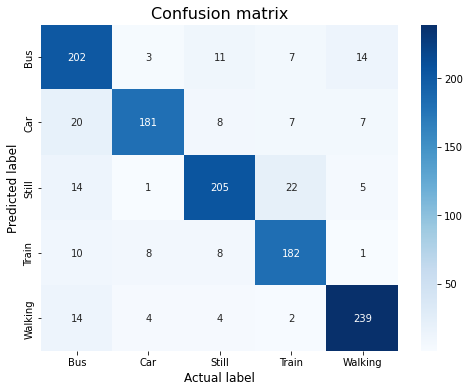

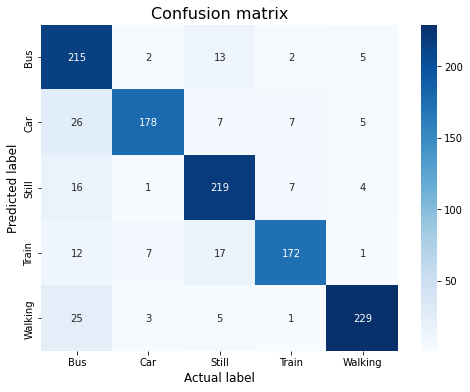

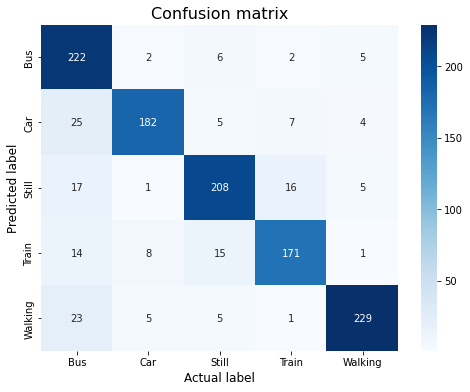

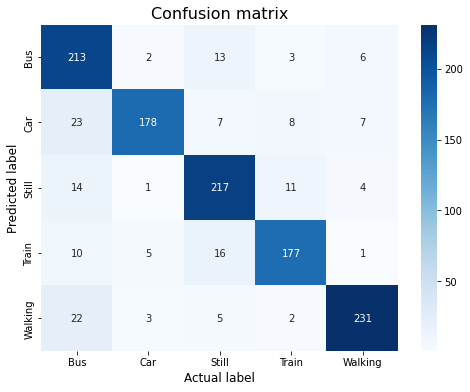

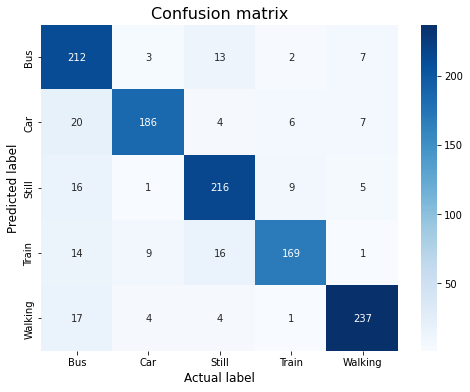

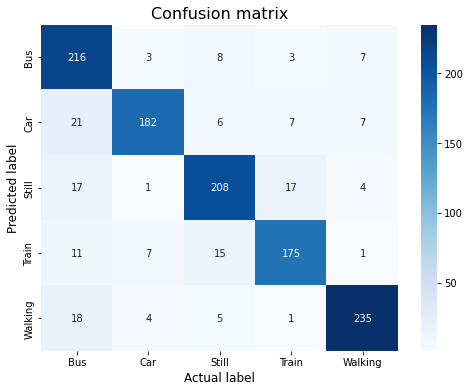

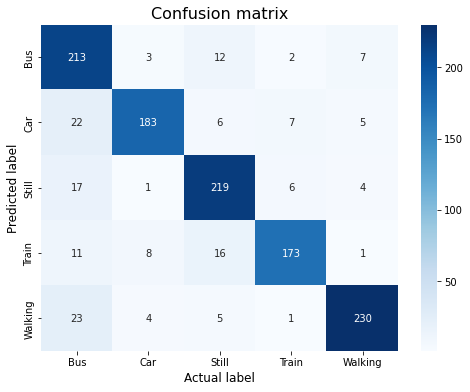

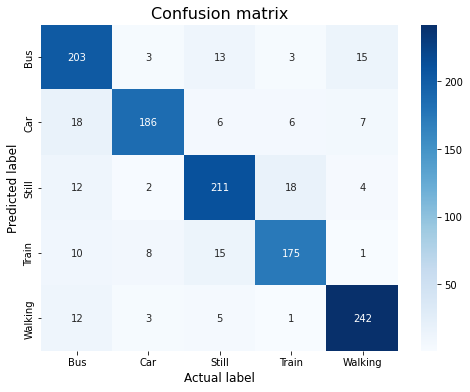

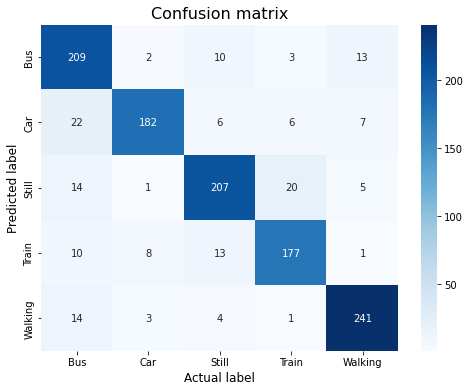

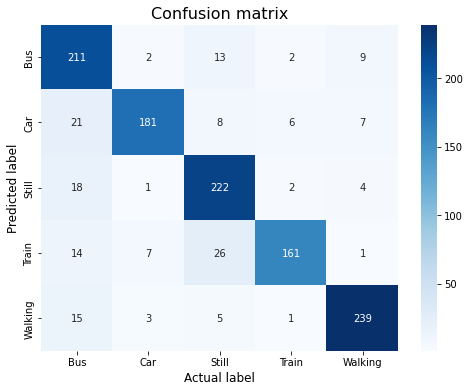

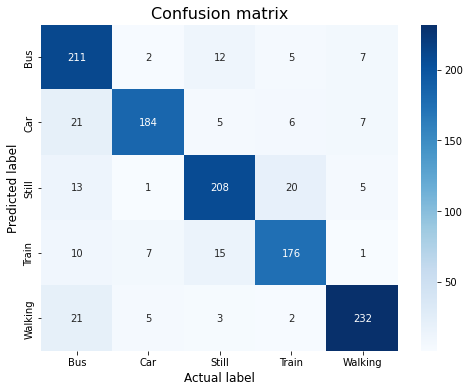

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(20, 5)
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        #print(4)
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(20, 5)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=1)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    #print(average_weights)
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)